# Chapter 3 Exercises

In [1]:
import os
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from IPython.display import SVG, display
from pandas.plotting import parallel_coordinates
from scipy import stats
from theano import shared, tensor

np.random.seed(seed=0)
az.style.use('arviz-darkgrid')

Bad val "cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])" on line #240
	"axes.prop_cycle    : cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])  # color cycle for plot lines
"
	in file "C:\Users\zhaolei\.matplotlib\matplotlibrc"
	Key axes.prop_cycle: 'cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])' is not a valid cycler construction: invalid syntax (<string>, line 1)


## Question 1
***

*Check the following definition of a probabilistic model. Identify the likelihood, the prior and the posterior:*

\begin{eqnarray}
y_i \text{~} Normal(\mu, \sigma) \newline
\mu \text{~} Normal(0,10) \newline
\sigma \text{~} \left|Normal(0,25) \right|
\end{eqnarray}

The priors in this model are:

\begin{eqnarray}
\mu \text{~} Normal(0,10) \newline
\sigma \text{~} \left|Normal(0,25) \right|
\end{eqnarray}


The likelihood in our model is  :
$$ Normal(\mu, \sigma)$$

And the posterior will be a distribution over $\mu$ and $\sigma$, but the posterior is not directly specified in the model (it is the result of Bayes formula!).

## Question 2
***

*For the model in exercise 1, how many parameters will the posterior have? In other words, how many dimensions will it have?*

There are two parameters in this model: $\mu$ and $\sigma$. So the posterior is 2-dimensional.

## Question 3
***

*Write Bayes' theorem for the model in exercise 1.*

Without expanding the denominator:

$$ p(\mu, \sigma | y) = \frac{\Pi_i\; \bigg( Normal(y| \mu, \sigma)\quad Normal(\mu|0,10)\quad HalfNormal(\sigma|0,25) \bigg) }{p(y)}  $$

Expanding the denominator:
$$ p(\mu, \sigma | y) = \frac{\Pi_i\; \bigg( Normal(y| \mu, \sigma)\quad Normal(\mu|0,10)\quad HalfNormal(\sigma|0,25) \bigg) }{\int \int\; \Pi_i\; \bigg( Normal(y| \mu, \sigma)\quad Normal(\mu|0,10)\quad HalfNormal(\sigma|0,25) \bigg)\; d\mu\; d\sigma} $$

## Question 4
***

*Check the following model. Identify the linear model and the likelihood. How many parameters does the posterior have?*

\begin{eqnarray}
y \text{~} Normal(\mu, \epsilon) \newline
\mu = \alpha + \beta x \newline
\alpha \text{~} Normal(0,10) \newline
\beta \text{~} Normal(0,1) \newline
\epsilon \text{~} \left|Normal(0,25) \right|
\end{eqnarray}

The linear model is:
\begin{eqnarray}
\mu = \alpha + \beta x
\end{eqnarray}


The likelihood in our model is:  
$$ Normal(\mu, \epsilon)$$

The posterior will have three parameters:

$$ \alpha, \beta, \epsilon $$

## Question 5
***

*For the model in exercise 1, assume that you have a dataset with 57 data points coming from a Gaussian with a mean of 4 and a standard deviation of 0.5. Using PyMC3, compute:*
- The posterior distribution
- The prior distribution
- The posterior predictive distribution
- The prior predictive distribution

*Tip: Besides `pm.sample()`, PyMC3 has other functions to compute samples.*

For this exercise we will generate 57 datapoints from a distribution of $Normal(4, 0.5)$:

In [3]:
data = stats.norm(4,.5).rvs(size=57)

In [4]:
with pm.Model() as model:
    mu = pm.Normal("mu", 0, 10)
    sd = pm.HalfNormal("sd", 25)
    y = pm.Normal("y,", mu, sd, observed=data)
    
    # Compute both prior, and prior predictive ËÆ°ÁÆóÂÖàÈ™åÈ¢ÑÊµã
    prior_predictive = pm.sample_prior_predictive()
    
    # Compute posterior
    trace = pm.sample()
    
    # Compute posterior predictive ËÆ°ÁÆóÂêéÈ™åÈ¢ÑÊµã
    posterior_predictive = pm.sample_posterior_predictive(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:01<00:00, 892.06it/s]


In [5]:
dataset = az.from_pymc3(trace=trace, posterior_predictive=posterior_predictive, prior=prior_predictive)
dataset

Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> prior
	> prior_predictive
	> observed_data

Let's plot the prior distributions to get a sense of what the Bayesian model's estimations without data

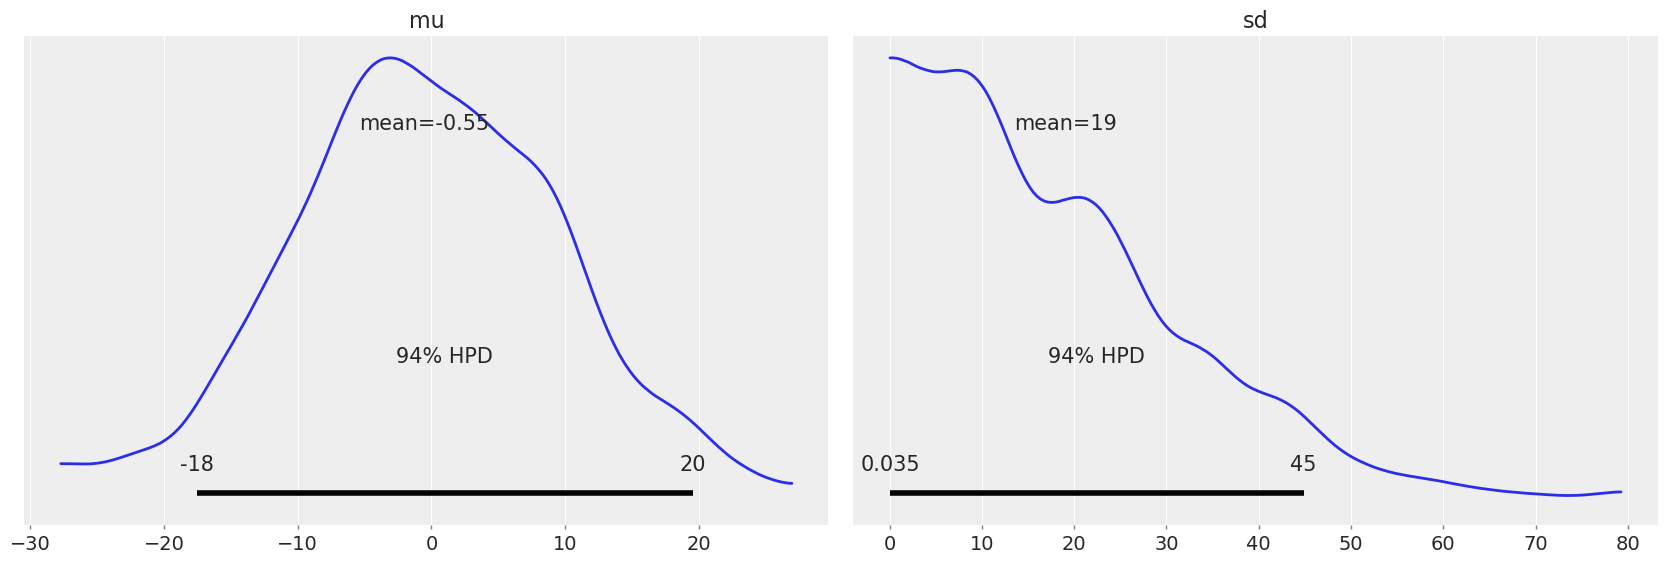

In [6]:
# The plot_posterior method can be used to plot priors as well
az.plot_posterior(dataset.prior, var_names=["mu", "sd"]);

Now let's plot the posterior, to check the distributions after update:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E606DFCB00>,
      dtype=object)

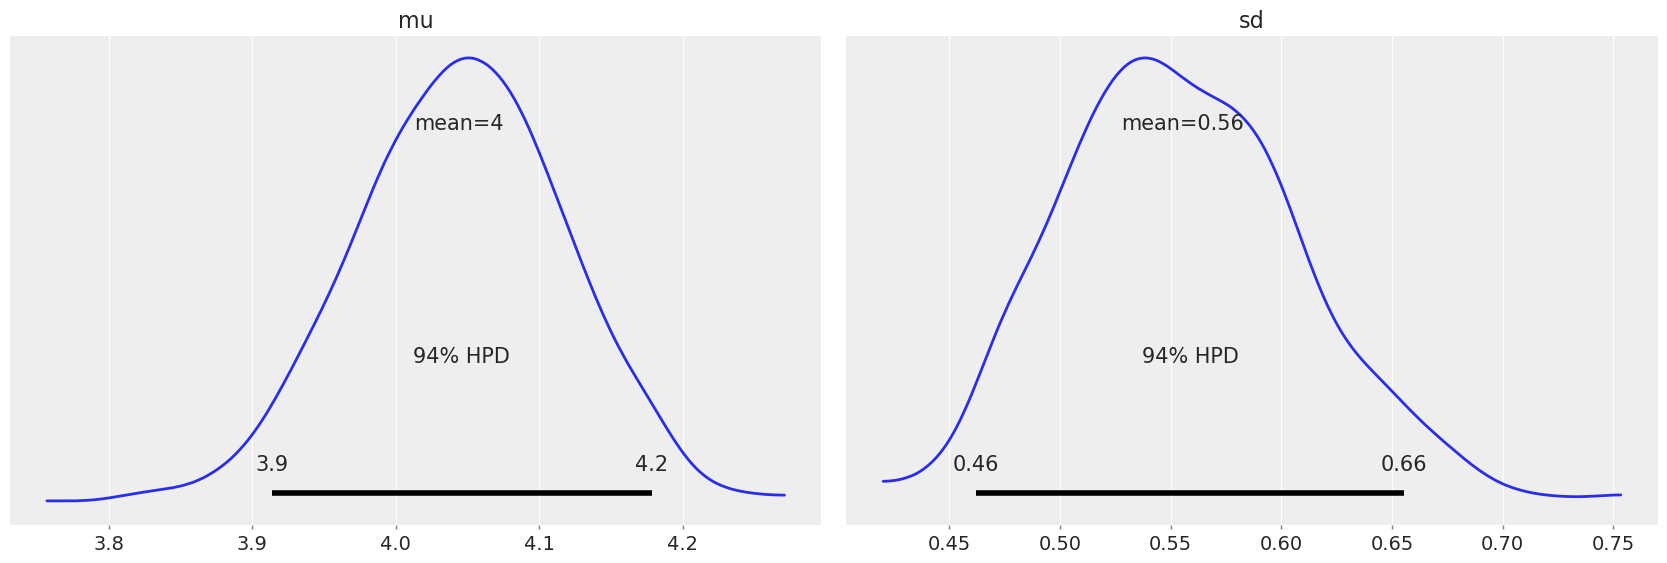

In [9]:
# Compare above plot to posterior distribution below, as well as to original parameters in distribution
az.plot_posterior(dataset.posterior, var_names=["mu", "sd"])
#az.plot_posterior(dataset)

The exercise also asks for the prior predictive values. We'll need to do some data manipulation to get the data into a format we can use with ArviZ:

In [13]:
dataset.prior_predictive

<xarray.Dataset>
Dimensions:   (chain: 1, draw: 500, y,_dim_0: 57)
Coordinates:
  * chain     (chain) int32 0
  * draw      (draw) int32 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * y,_dim_0  (y,_dim_0) int32 0 1 2 3 4 5 6 7 8 ... 48 49 50 51 52 53 54 55 56
Data variables:
    y,        (chain, draw, y,_dim_0) float64 3.668 2.872 ... -14.44 -4.972
    sd_log__  (chain, draw) float64 -0.6766 3.517 2.947 ... 4.373 1.556 3.518
Attributes:
    created_at:                 2020-04-25T08:12:28.357341
    inference_library:          pymc3
    inference_library_version:  3.8

Let's also plot the prior predictive values, we'll need to do some data manipulation to get the data into a format we can use with ArviZ

In [15]:
print(dataset.prior_predictive["y,"].values.shape)
prior_predictive = dataset.prior_predictive["y,"].values.flatten()
prior_predictive.shape

(1, 500, 57)


(28500,)

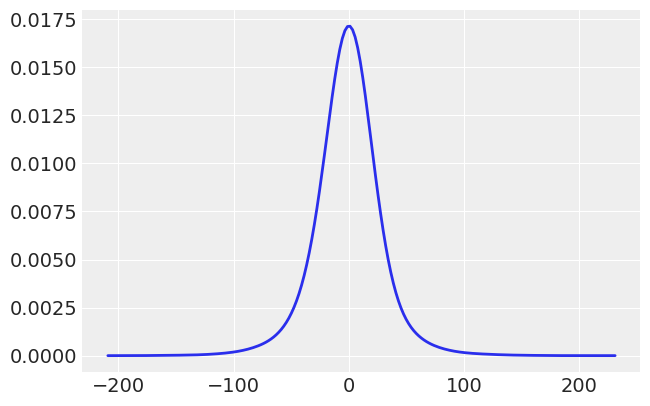

In [16]:
az.plot_kde(prior_predictive);

We can them compare this to the posterior predictive distribution:

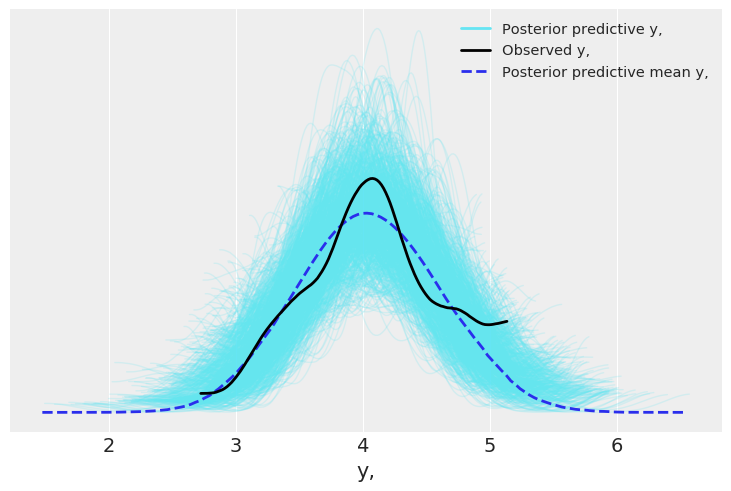

In [17]:
az.plot_ppc(dataset);

ÂêåÊ†∑ÁöÑÊñπÊ≥ï‰πüÈÄÇÁî®‰∫éÂêéÈ™åÈ¢ÑÊµã

In [18]:
dataset.posterior_predictive

<xarray.Dataset>
Dimensions:   (chain: 2, draw: 500, y,_dim_0: 57)
Coordinates:
  * chain     (chain) int32 0 1
  * draw      (draw) int32 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * y,_dim_0  (y,_dim_0) int32 0 1 2 3 4 5 6 7 8 ... 48 49 50 51 52 53 54 55 56
Data variables:
    y,        (chain, draw, y,_dim_0) float64 3.502 4.739 4.924 ... 3.801 3.198
Attributes:
    created_at:                 2020-04-25T08:12:28.354349
    inference_library:          pymc3
    inference_library_version:  3.8

In [20]:
print(dataset.posterior_predictive["y,"].values.shape)
posterior_predictive = dataset.posterior_predictive["y,"].values.flatten()
posterior_predictive.shape

(2, 500, 57)


(57000,)

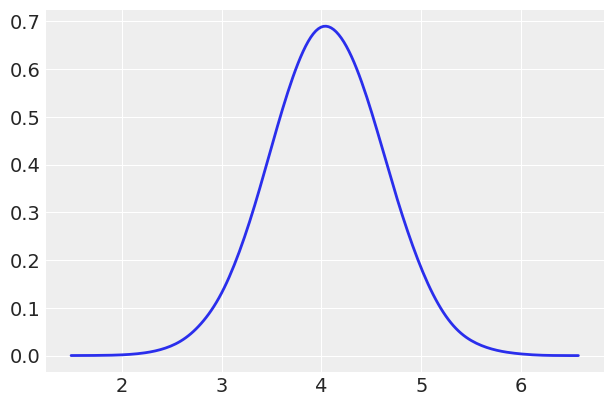

In [21]:
az.plot_kde(posterior_predictive);

## Question 6
***

*Execute `model_g` using NUTS (the default sampler) and then using Metropolis. Compare the results using ArviZ functions like `plot_trace` and `plot_pairs`. Center the variable $x$ and repeat the exercise. What conclusion can you draw from this?*

In [22]:
np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

In [23]:
with pm.Model() as model_g:
    Œ± = pm.Normal('Œ±', mu=0, sd=10)
    Œ≤ = pm.Normal('Œ≤', mu=0, sd=1)
    œµ = pm.HalfCauchy('œµ', 5)

    Œº = pm.Deterministic('Œº', Œ± + Œ≤ * x)
    y_pred = pm.Normal('y_pred', mu=Œº, sd=œµ, observed=y)

In [24]:
%%time
with model_g:
    trace_nuts_non_centered = pm.sample(draws=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [œµ, Œ≤, Œ±]
Sampling 2 chains, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:14<00:00, 139.97draws/s]


Wall time: 37.2 s


In [25]:
nuts_non_centered_dataset = az.from_pymc3(trace=trace_nuts_non_centered)

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

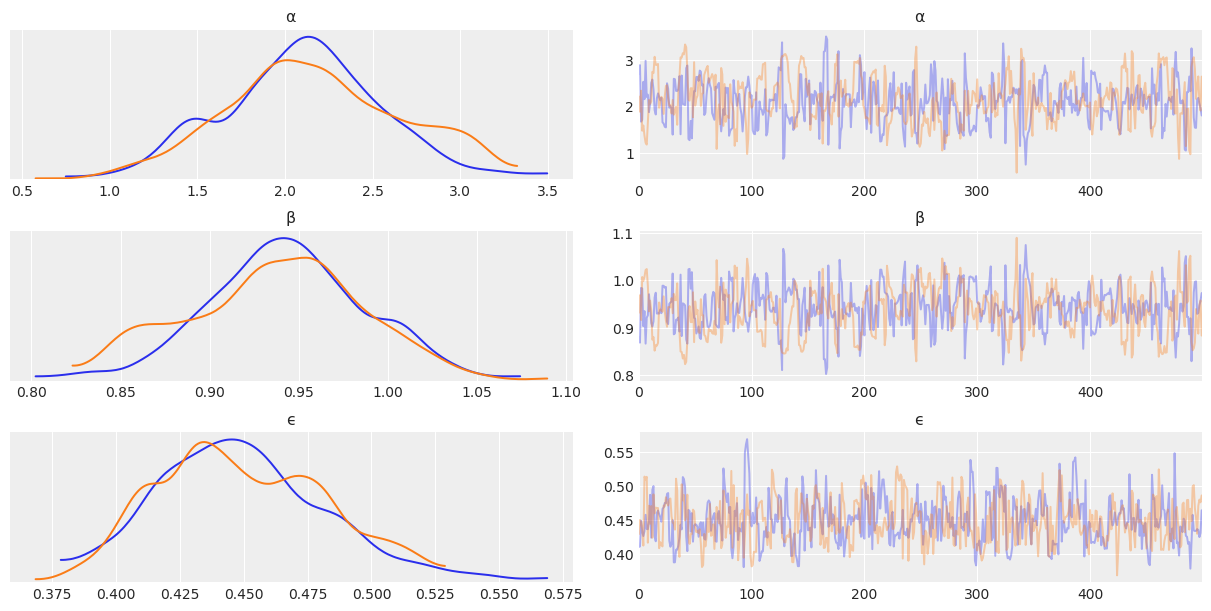

In [26]:
az.plot_trace(trace_nuts_non_centered, var_names=['Œ±', 'Œ≤', 'œµ']);

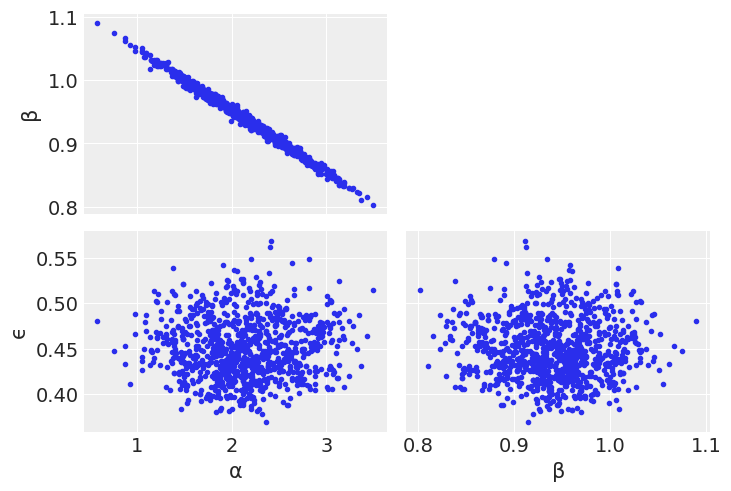

In [27]:
az.plot_pair(trace_nuts_non_centered, var_names=['Œ±', 'Œ≤', 'œµ']);

In [28]:
%%time
with model_g:
    step = pm.Metropolis()
    trace_mh_non_centered = pm.sample(draws=500, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [œµ]
>Metropolis: [Œ≤]
>Metropolis: [Œ±]
Sampling 2 chains, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:03<00:00, 526.75draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Wall time: 38.2 s


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

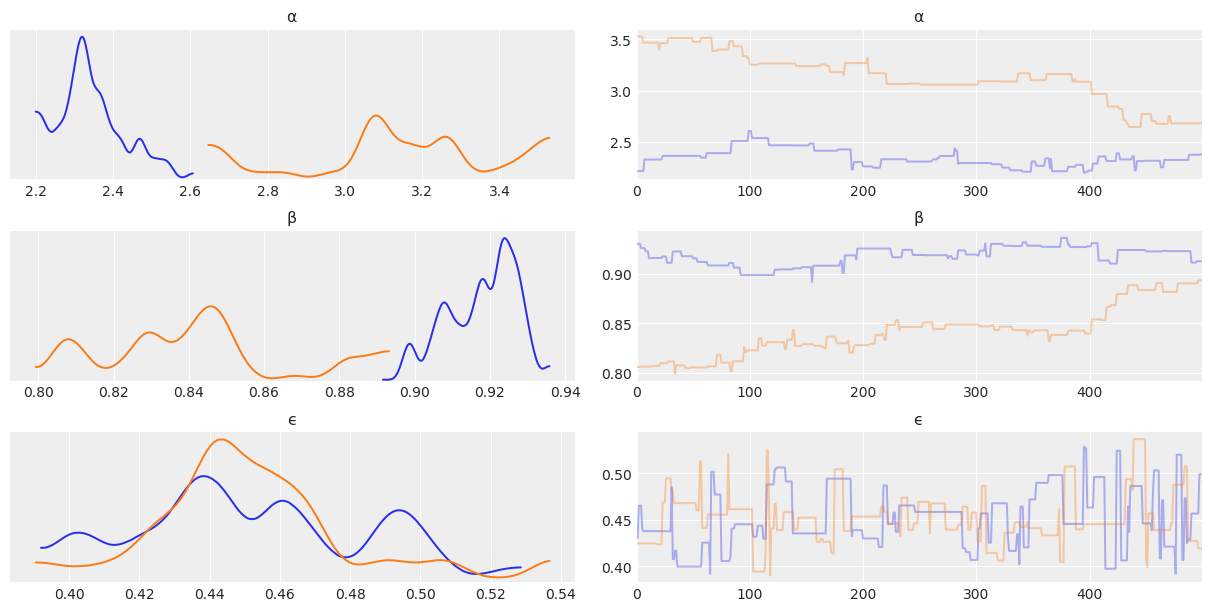

In [29]:
az.plot_trace(trace_mh_non_centered, var_names=['Œ±', 'Œ≤', 'œµ']);

In [30]:
az.summary(trace_nuts_non_centered, var_names=['Œ±', 'Œ≤', 'œµ'])

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±  2.128  0.480   1.298    3.077      0.026    0.019     342.0   323.0   
Œ≤  0.940  0.047   0.843    1.018      0.003    0.002     342.0   342.0   
œµ  0.449  0.033   0.394    0.514      0.002    0.001     391.0   390.0   

   ess_bulk  ess_tail  r_hat  
Œ±     350.0     339.0   1.01  
Œ≤     350.0     334.0   1.01  
œµ     392.0     453.0   1.00

In [31]:
az.summary(trace_mh_non_centered, var_names=['Œ±', 'Œ≤', 'œµ'])

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±  2.740  0.435   2.209    3.469      0.295    0.245       2.0     2.0   
Œ≤  0.879  0.042   0.806    0.928      0.029    0.024       2.0     2.0   
œµ  0.452  0.030   0.400    0.507      0.003    0.002     110.0   110.0   

   ess_bulk  ess_tail  r_hat  
Œ±       3.0      12.0   2.41  
Œ≤       3.0      12.0   2.41  
œµ     106.0      75.0   1.02

Now let's standardize the variables and take samples again. We don't need to redefine the model, but we'll do so for clarities sake:

In [32]:
# standardize the data
x_centered = (x - x.mean())/x.std()
y_centered = (y - y.mean())/y.std()

In [33]:
with pm.Model() as model_g_centered:
    Œ± = pm.Normal('Œ±', mu=0, sd=10)
    Œ≤ = pm.Normal('Œ≤', mu=0, sd=1)
    œµ = pm.HalfCauchy('œµ', 5)

    Œº = pm.Deterministic('Œº', Œ± + Œ≤ * x_centered)
    y_pred = pm.Normal('y_pred', mu=Œº, sd=œµ, observed=y_centered)  #xyÈÉΩË¶ÅÊ†áÂáÜÂåñ

In [34]:
%%time
with model_g_centered:
    trace_nuts_centered = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [œµ, Œ≤, Œ±]
Sampling 2 chains, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:07<00:00, 266.23draws/s]


Wall time: 25.8 s


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

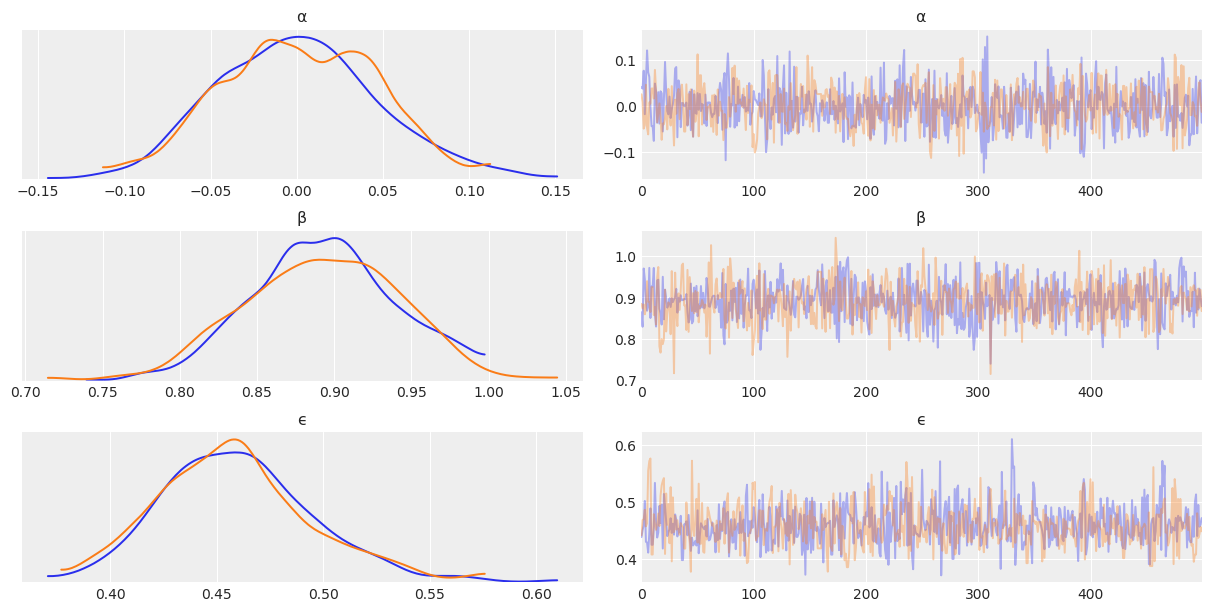

In [35]:
az.plot_trace(trace_nuts_centered, var_names=['Œ±', 'Œ≤', 'œµ']);

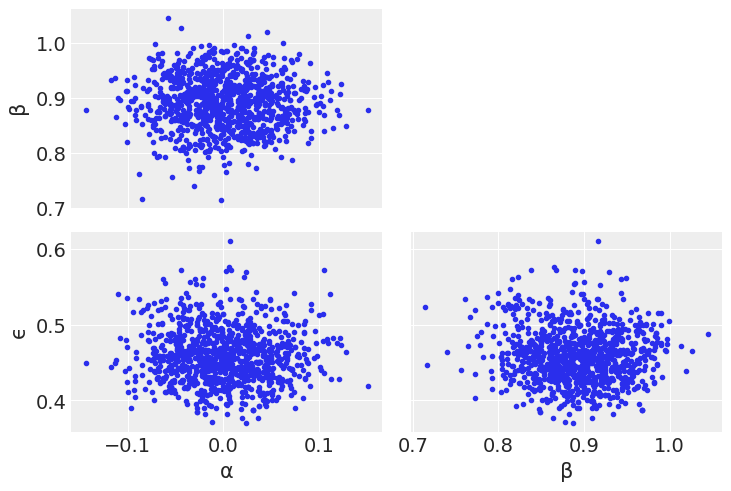

In [36]:
az.plot_pair(trace_nuts_centered, var_names=['Œ±', 'Œ≤', 'œµ']);

In [37]:
%%time
with model_g_centered:
    step = pm.Metropolis()
    trace_mh_centered = pm.sample(step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [œµ]
>Metropolis: [Œ≤]
>Metropolis: [Œ±]
Sampling 2 chains, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:04<00:00, 494.05draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Wall time: 28 s


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E607215CC0>,
      dtype=object)

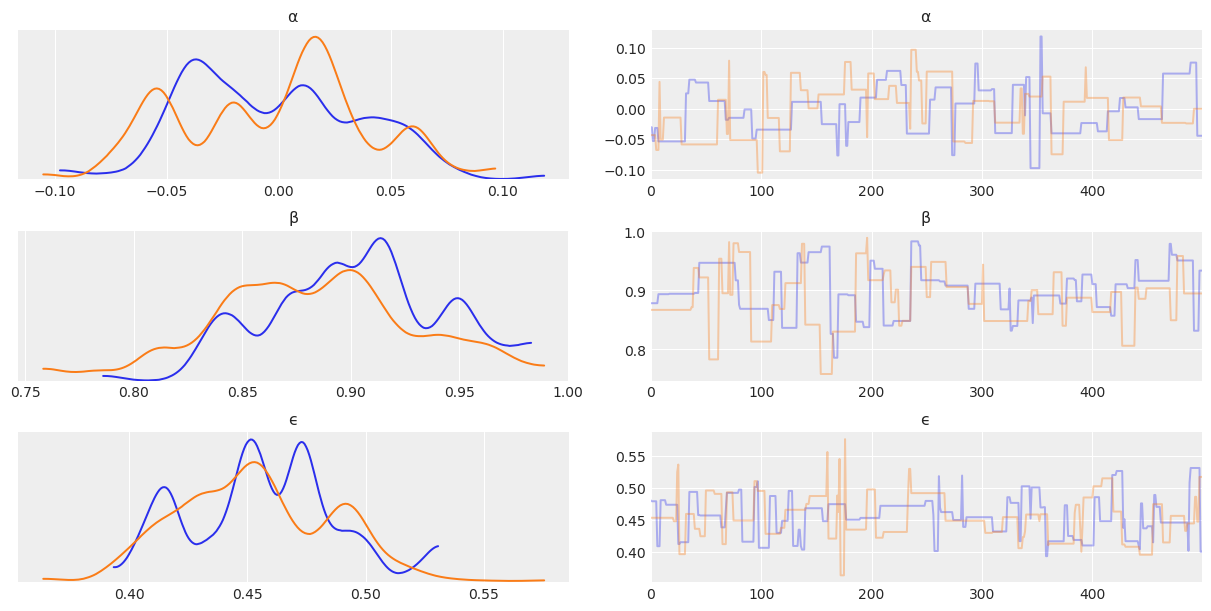

In [38]:
az.plot_trace(trace_mh_centered, var_names=['Œ±', 'Œ≤', 'œµ'])

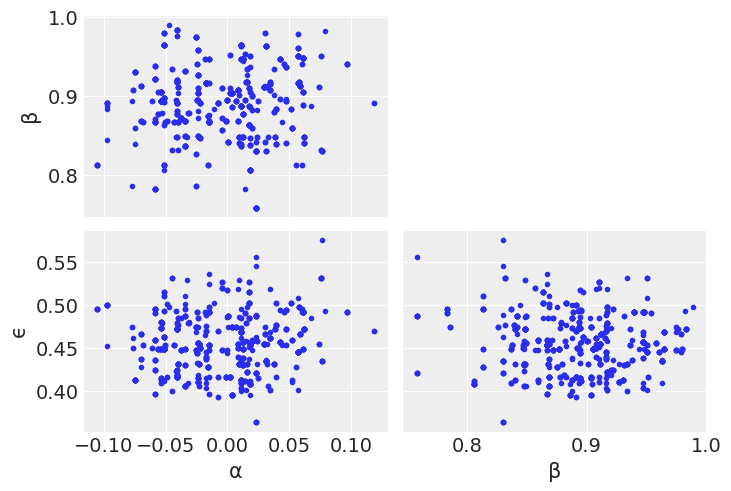

In [39]:
az.plot_pair(trace_mh_centered, var_names=['Œ±', 'Œ≤', 'œµ']);

In [40]:
az.summary(trace_nuts_centered, var_names=['Œ±', 'Œ≤', 'œµ'])

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±  0.000  0.046  -0.079    0.086      0.001    0.002    1016.0   358.0   
Œ≤  0.892  0.048   0.811    0.985      0.002    0.001     944.0   944.0   
œµ  0.459  0.036   0.394    0.528      0.001    0.001     868.0   834.0   

   ess_bulk  ess_tail  r_hat  
Œ±    1023.0     635.0    1.0  
Œ≤     938.0     625.0    1.0  
œµ     930.0     577.0    1.0

In [41]:
az.summary(trace_mh_centered, var_names=['Œ±', 'Œ≤', 'œµ'])

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ± -0.003  0.040  -0.070    0.062      0.005    0.004      61.0    61.0   
Œ≤  0.891  0.045   0.830    0.983      0.005    0.004      78.0    78.0   
œµ  0.455  0.032   0.396    0.502      0.003    0.002     120.0   120.0   

   ess_bulk  ess_tail  r_hat  
Œ±      62.0      56.0   1.02  
Œ≤      78.0      83.0   1.08  
œµ     120.0     146.0   1.01

Looking through the plots there's a couple things to note.

Metropolis Hastings is less effective at sampling than NUTS. This is indicated by:
 1. The Metropolis Hasting trace plots looking "square" when compared the NUTS traceplot. This is due to the sampler getting "stuck" at a value.‰∏éNUTSËΩ®ËøπÂõæÁõ∏ÊØîÔºåMetropolis HastingËΩ®ËøπÂõæÁúãËµ∑Êù•‚ÄúÊñπÂΩ¢‚Äù„ÄÇ ËøôÊòØÁî±‰∫éÈááÊ†∑Âô®‚ÄúÂç°‰Ωè‚Äù‰∫ÜÊüê‰∏™ÂÄº„ÄÇ
 2. The kernel density estimates of each chain have "squiggly" topologies ÊØè‰∏™ÈìæÁöÑÂÜÖÊ†∏ÂØÜÂ∫¶‰º∞ËÆ°ÂÖ∑Êúâ‚ÄúÂºØÊõ≤‚ÄùÁöÑÊãìÊâë
 3. The effective number of samples for Non Centered Metropolis Hastings is 1  Èùû‰∏≠ÂøÉMetropolis HastingsÁöÑÊúâÊïàÊ†∑Êú¨Êï∞‰∏∫1
 
One thing to note though is that Metropolis Hastings does sample faster than NUTS. While the results aren't great, credit is due where it's deserved!‰∏çËøáË¶ÅÊ≥®ÊÑèÁöÑ‰∏Ä‰ª∂‰∫ãÊòØÔºåMetropolis HastingsÁöÑÈááÊ†∑ÈÄüÂ∫¶ÊØîNUTSÂø´„ÄÇ ËôΩÁÑ∂ÊïàÊûú‰∏ç‰Ω≥Ôºå‰ΩÜÂÄºÂæóÂ∫îÂæóÁöÑËç£Ë™âÔºÅÂ•ΩÂÉèÂÆûÈ™åÁªìÊûú‰πü‰∏çÊòØ
 
Diving into the problem further, we can see that $\alpha$ and $\beta$ are linearly correlated. Metropolis Hastings does not sample well when toplogies have such shapes. We'll talk more about this in Chapter 8, but for now note how centering x helps somewhat with the Metropolis Hasting sampler, as centering decorrelates $\alpha$ and $\beta$ parameters.Ëøõ‰∏ÄÊ≠•ÂàÜÊûêËØ•ÈóÆÈ¢òÔºåÊàë‰ª¨ÂèØ‰ª•ÁúãÂà∞$ \ alpha $Âíå$ \ beta $ÊòØÁ∫øÊÄßÁõ∏ÂÖ≥ÁöÑ„ÄÇ ÂΩìÊãìÊâëÁªìÊûÑÂÖ∑ÊúâËøôÁßçÂΩ¢Áä∂Êó∂ÔºåMetropolis HastingsÊó†Ê≥ïÂæàÂ•ΩÂú∞ËøõË°åÈááÊ†∑„ÄÇ Êàë‰ª¨Â∞ÜÂú®Á¨¨8Á´†‰∏≠ÂØπÊ≠§ËøõË°åÊõ¥Â§öËÆ®ËÆ∫Ôºå‰ΩÜÊòØÁé∞Âú®ËØ∑Ê≥®ÊÑèÂ±Ö‰∏≠xÂú®Metropolis HastingÈááÊ†∑Âô®‰∏äÊúâ‰ªÄ‰πàÂ∏ÆÂä©ÔºåÂõ†‰∏∫Â±Ö‰∏≠Â∞Ü$ \ alpha $Âíå$ \ beta $ÂèÇÊï∞Áõ∏ÂÖ≥„ÄÇ

The biggest takeaway is the effectiveness of NUTS, regardless of topology in these two cases. This is not to say NUTS can handle anything you throw at it, there are some topologies that are hard, but by and large NUTS does quite well in many situations.Êó†ËÆ∫Ëøô‰∏§ÁßçÊÉÖÂÜµ‰∏ãÁöÑÊãìÊâëÂ¶Ç‰ΩïÔºåÊúÄÂ§ßÁöÑÊî∂Ëé∑Â∞±ÊòØNUTSÁöÑÊúâÊïàÊÄß„ÄÇ ËøôÂπ∂‰∏çÊòØËØ¥NUTSÂèØ‰ª•Â§ÑÁêÜÊÇ®ÊâîÁªôÂÆÉÁöÑ‰ªª‰Ωï‰∏úË•øÔºåÊúâ‰∫õÊãìÊâëÂæàÈöæÔºå‰ΩÜÊòØÊÄªÁöÑÊù•ËØ¥NUTSÂú®ËÆ∏Â§öÊÉÖÂÜµ‰∏ãÈÉΩÂÅöÂæóÂæàÂ•Ω„ÄÇ

## Question 7
***

*Use the howell dataset to create a linear model of the weight ($x$) against the height ($y$). Exclude subjects that are younger than 18. Explain the results.*

Let's import the dataset and create a mask for people older than 18:

In [2]:
howell = pd.read_csv("../code/data/howell.csv", delimiter=";")
howell.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041915  41.0     1
4  145.415  41.276872  51.0     0

In [3]:
age_18_mask = howell["age"] > 18

A good first step is before diving into statistics is to look at the data and ask if it make sense. In my experience taller people tend to weigh more than shorter people. Let's check the data to be sure.Âú®Ê∑±ÂÖ•Á†îÁ©∂ÁªüËÆ°Êï∞ÊçÆ‰πãÂâçÔºåÊúÄÂ•ΩÁöÑÁ¨¨‰∏ÄÊ≠•ÊòØÊü•ÁúãÊï∞ÊçÆÂπ∂ËØ¢ÈóÆÊòØÂê¶ÊúâÊÑè‰πâ„ÄÇ ‰ª•ÊàëÁöÑÁªèÈ™åÔºåÈ´ò‰∏™Â≠êÁöÑ‰∫∫ÊØîÁüÆ‰∏™Â≠êÁöÑ‰∫∫‰ΩìÈáçÊõ¥Â§ß„ÄÇ ËÆ©Êàë‰ª¨Ê£ÄÊü•Êï∞ÊçÆ‰ª•Á°Æ‰øù„ÄÇ

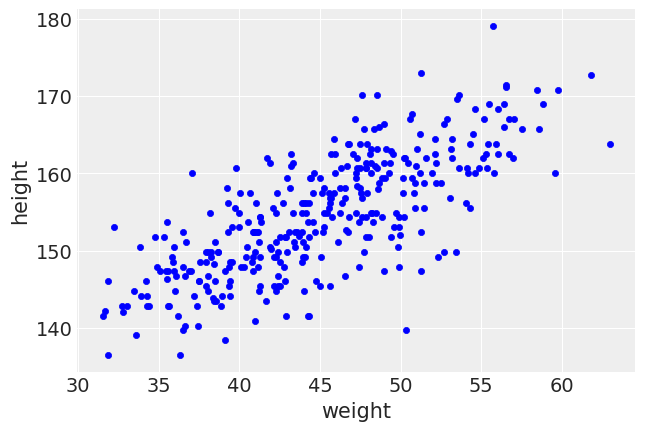

In [4]:
howell[age_18_mask].plot(kind="scatter", x="weight", y="height");

When looking at the plot above this is with consistent our expectations. As weight increases, height increases as well. From visual inspection, it looks like a linear fit with some noise is best. In this case we will assume constant variance. Let's create a model:
ÂΩìÁúã‰∏äÈù¢ÁöÑÂõæÊó∂ÔºåËøôÁ¨¶ÂêàÊàë‰ª¨ÁöÑÊúüÊúõ„ÄÇ ÈöèÁùÄÈáçÈáèÁöÑÂ¢ûÂä†ÔºåË∫´È´ò‰πüÈöè‰πãÂ¢ûÂä†„ÄÇ ‰ªéÂ§ñËßÇÊ£ÄÊü•Êù•ÁúãÔºåÁúãËµ∑Êù•ÂÉèÁ∫øÊÄßÊãüÂêàÂπ∂Â∏¶Êúâ‰∏Ä‰∫õÂô™Â£∞ÊòØÊúÄÂ•ΩÁöÑ„ÄÇ Âú®ËøôÁßçÊÉÖÂÜµ‰∏ãÔºåÊàë‰ª¨Â∞ÜÂÅáËÆæÊÅíÂÆöÊñπÂ∑Æ„ÄÇ ËÆ©Êàë‰ª¨ÂàõÂª∫‰∏Ä‰∏™Ê®°ÂûãÔºö

Êàë‰ª¨ÂÆö‰πâ‰∏Ä‰∏™ÂÖ±‰∫´ÂèòÈáèx_shared„ÄÇ Âú®Ê®°ÂûãÊãüÂêà‰πãÂêéÔºåÊàë‰ª¨Â∞Ü‰ΩøÁî®ÂÆÉÊù•Êõ¥ÊîπxÂèòÈáèÁöÑÂÄºÔºàÂú®Êú¨Á§∫‰æã‰∏≠‰∏∫weightÔºâÔºåËÄåÊó†ÈúÄÈáçÊñ∞ÊãüÂêàÊ®°Âûã

In [44]:
height = howell["height"]
weight = howell["weight"]
weigh1= weight[age_18_mask].values

In [45]:
with pm.Model() as over_18_heights:
    Œ± = pm.Normal("Œ±", sd=10)
    Œ≤ = pm.Normal("Œ≤", sd=10)
    œµ = pm.HalfNormal("œµ", sd=10)
    
    weight_shared = pm.Data("weight_shared",weigh1)
    Œº = pm.Deterministic("Œº", Œ±+Œ≤*weight_shared)
    
    height_pred = pm.Normal("height_pred", mu=Œº, sd=œµ, observed = height[age_18_mask])
    trace_over_18_heights = pm.sample(tune=2000,cores=1)
    ppc_over_18_heights = pm.sample_posterior_predictive(trace_over_18_heights, samples=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [œµ, Œ≤, Œ±]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:04<00:00, 486.22it/s]


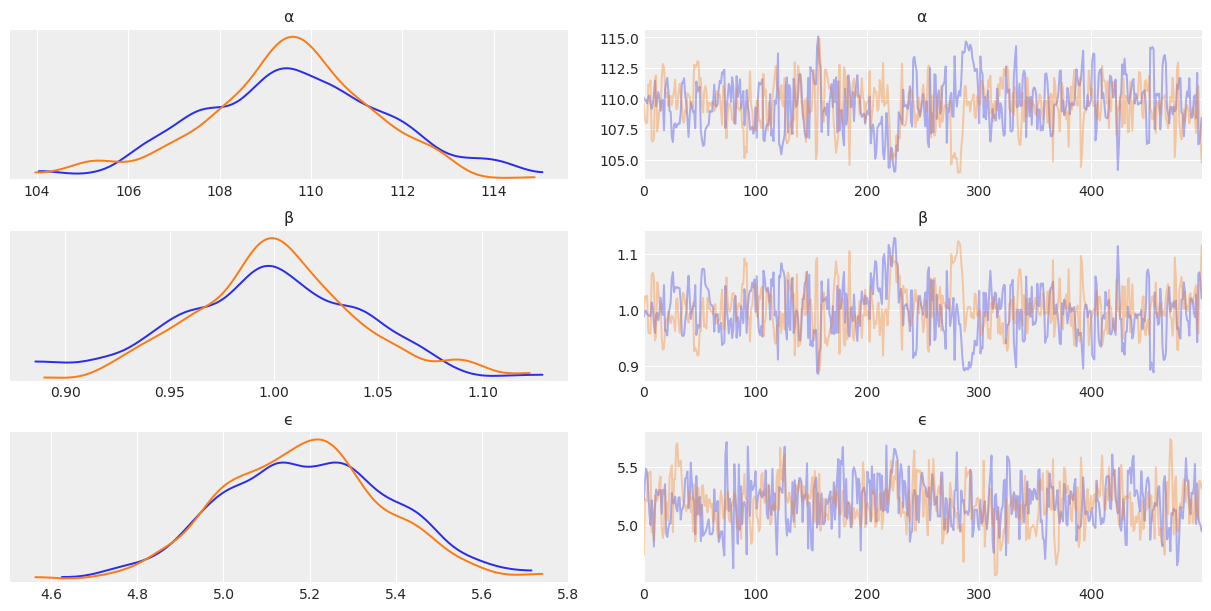

In [31]:
weight_shared.set_value(weight[age_18_mask].values)
az.plot_trace(trace_over_18_heights, var_names = ["Œ±","Œ≤", "œµ"]);

Looking at the traceplot it looks like the inference engine was able to explore the posterior adequately. Let's plot the regression and the hpd.Êü•ÁúãË∑üË∏™ÂõæÔºåÁúãÊù•Êé®ÁêÜÂºïÊìéËÉΩÂ§üÂÖÖÂàÜÊé¢Á©∂ÂêéÈ™å„ÄÇ ËÆ©Êàë‰ª¨ÁªòÂà∂ÂõûÂΩíÂíåhpd„ÄÇ

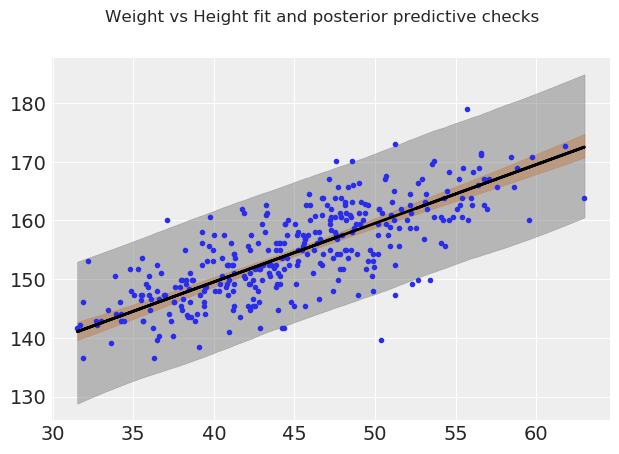

In [54]:
fig, ax = plt.subplots()

ax.plot(weight[age_18_mask], height[age_18_mask], "C0.")
Œº_m = trace_over_18_heights["Œº"].mean(0)
œµ_m = trace_over_18_heights["œµ"].mean()

ax.plot(weight[age_18_mask], Œº_m, c="k")
az.plot_hpd(weight[age_18_mask], trace_over_18_heights["Œº"], credible_interval=.98)
az.plot_hpd(weight[age_18_mask], ppc_over_18_heights["height_pred"], credible_interval=.98, color="gray")
fig.suptitle("Weight vs Height fit and posterior predictive checks");

From visual inspection the average parameters of the fit look quite good, and the 98% interval of the posterior predictive checks covers most of the distribution. Overall, it looks like a linear fit is great for height vs weight for people over 18!‰ªéÂ§ñËßÇÊ£ÄÊü•Êù•ÁúãÔºåÊãüÂêàÁöÑÂπ≥ÂùáÂèÇÊï∞ÁúãËµ∑Êù•ÈùûÂ∏∏Â•ΩÔºåÂπ∂‰∏îÂêéÈ¢ÑÊµãÊ£ÄÊü•ÁöÑ98ÔºÖÈó¥ÈöîÊ∂µÁõñ‰∫ÜÂ§ßÈÉ®ÂàÜÂàÜÂ∏É„ÄÇ ÊÄª‰ΩìËÄåË®ÄÔºåÁúãËµ∑Êù•Á∫øÊÄßÊãüÂêàÈùûÂ∏∏ÈÄÇÂêà18Â≤Å‰ª•‰∏äÁöÑ‰∫∫Áæ§Ë∫´È´òvs‰ΩìÈáçÔºÅ

## Question 8
***

*For four subjects, we get the weights (45.73, 65.8, 54.2, 32.59), but not their heights. Using the model from the previous exercise, predict the height for each subject, together with their 50% and 94% HPDs.*

*Tip 1: Check the [coal mining disaster example](https://docs.pymc.io/notebooks/getting_started.html#Case-study-2:-Coal-mining-disasters) in PyMC3's documentation.*

*Tip 2: Use shared variables.*

Using our previous fit, we can generate predictions for the height of people with various weights:

In [53]:
weights = (45.73, 65.8, 54.2, 32.59)
data1=np.linspace(30,70,500)

In [56]:
with over_18_heights:
    pm.set_data({"weight_shared": [65.8]})
#weight_shared.set_value([45.73])
#print(weight_shared.get_value())
    ppc = pm.sample_posterior_predictive(trace_over_18_heights, samples=2000)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:03<00:00, 629.97it/s]


In [57]:
ppc["height_pred"].shape

(2000, 346)

In [49]:
ppc_over_18_heights['height_pred'].shape

(2000, 346)

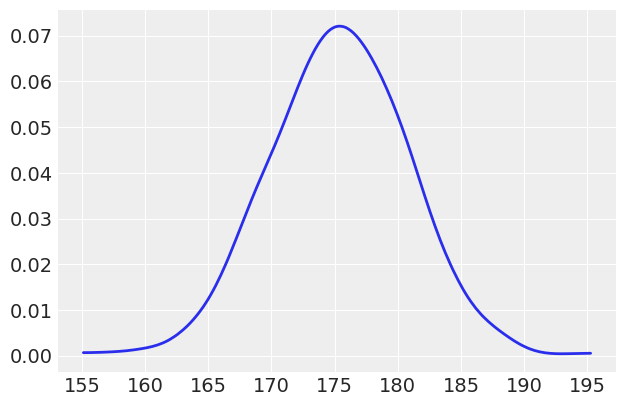

In [58]:
ppc_first_col = ppc["height_pred"][:,0]
az.plot_kde(ppc_first_col);

The reason we take the 0th column is that, in the current version of PyMC3, `pm.sample_ppc` returns an array of size $samples\; \times\; observed\; values$. This makes total sense when you want to do posterior predictive checks, as you want to check that the simulations/predictions have the  same size/shape as the observations. But when you just want to make predictions at values other that the input data, that restriction does not apply. In summary, I consider this a limitation of the current implementation of `pm.sample_ppc`.Êàë‰ª¨ÈÄâÊã©Á¨¨0ÂàóÁöÑÂéüÂõ†ÊòØÔºåÂú®ÂΩìÂâçÁâàÊú¨ÁöÑPyMC3‰∏≠Ôºåpm.sample_ppcËøîÂõûÂ§ßÂ∞è‰∏∫ùë†ùëéùëöùëùùëôùëíùë†√óùëúùëèùë†ùëíùëüùë£ùëíùëëùë£ùëéùëôùë¢ùëíùë†ÁöÑÊï∞ÁªÑ„ÄÇ ÂΩìÊÇ®Ë¶ÅËøõË°åÂêéÈ™åÈ¢ÑÊµãÊ£ÄÊü•Êó∂ÔºåËøôÂæàÊúâÊÑè‰πâÔºåÂõ†‰∏∫ÊÇ®ÊÉ≥Ê£ÄÊü•Ê®°Êãü/È¢ÑÊµãÊòØÂê¶ÂÖ∑Êúâ‰∏éËßÇÊµãÂÄºÁõ∏ÂêåÁöÑÂ§ßÂ∞è/ÂΩ¢Áä∂„ÄÇ ‰ΩÜÊòØÔºåÂΩìÊÇ®Âè™ÊÉ≥ÂØπËæìÂÖ•Êï∞ÊçÆ‰ª•Â§ñÁöÑÂÄºËøõË°åÈ¢ÑÊµãÊó∂ÔºåÂàô‰∏çÈÄÇÁî®ËØ•ÈôêÂà∂„ÄÇ ÊÄª‰πãÔºåÊàëËÆ§‰∏∫ËøôÊòØÂØπpm.sample_ppcÂΩìÂâçÂÆûÁé∞ÁöÑÈôêÂà∂„ÄÇ

### $samples\; \times\; observed\; values$ ÂΩìÊ†∑Êú¨ÈáèÂ§ß‰∫éËßÇÂØüÂÄºÊó∂ÔºåÂ∞ÜÈááÁî®Êñ∞ÁöÑÊ†∑Êú¨Á©∫Èó¥ÔºåÊØîÂ¶ÇÊ†∑Êú¨=500Êó∂Ôºå(2000, 500)ÔºõÂΩìÂè™ËæìÂÖ•‰∏Ä‰∏™ÂÄºËøõË°åÈ™åËØÅÊó∂ÔºåÊ†∑Êú¨Á©∫Èó¥‰æùÁÑ∂ÊòØ(2000, 346)ÔºåÈÇ£‰πàÁ¨¨‰∏Ä‰∏™ÂÄºindex=0,Â∞±ÊòØÊàë‰ª¨ÈúÄË¶ÅÁöÑÊï∞ÊçÆ

with over_18_heights:
    weight_shared = shared(weight.values * 1.)
weight_shared.set_value([45.73])
print(weight_shared.get_value())

with over_18_heights:
    weight_shared = pm.Data("weight_shared",weigh1)
with over_18_heights:
    pm.set_data({"weight_shared": [65.8]})

## Question 9
***

*Repeat exercise 7, this time including those below 18 years old. Explain the results.*

Let's take a look at the data again, now without the age limit:

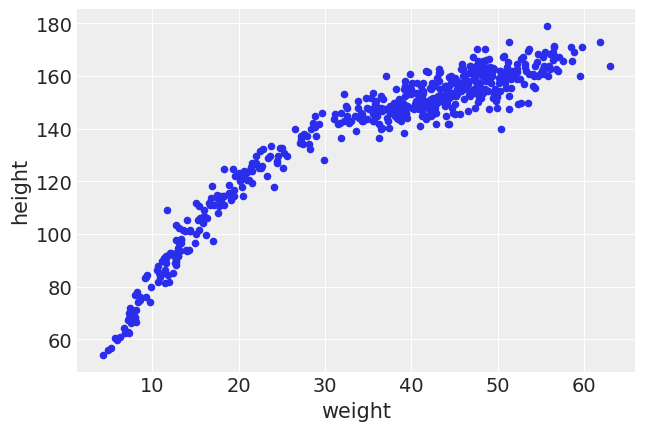

In [32]:
howell.plot(kind="scatter", x="weight", y="height");

By removing the age limit we notice a different trend. At lower weights, a single unit of weight generally corresponds to more height. At higher weights however the height still goes up, but by a lesser amount. There also seems to be more "spread" in the higher weights, than in the lower weights.ÈÄöËøáÂèñÊ∂àÂπ¥ÈæÑÈôêÂà∂ÔºåÊàë‰ª¨Ê≥®ÊÑèÂà∞‰∫Ü‰∏çÂêåÁöÑË∂ãÂäø„ÄÇ Âú®ËæÉ‰ΩéÁöÑÈáçÈáè‰∏ãÔºåÂçï‰∏™ÈáçÈáèÂçï‰ΩçÈÄöÂ∏∏ÂØπÂ∫î‰∫éÊõ¥Â§ßÁöÑÈ´òÂ∫¶„ÄÇ ‰ΩÜÊòØÔºåÈáçÈáèËæÉÈ´òÊó∂ÔºåÈ´òÂ∫¶‰ªç‰ºöÂ¢ûÂä†Ôºå‰ΩÜÊï∞Èáè‰ºöÂáèÂ∞ë„ÄÇ Âú®ËæÉÈ´òÁöÑÊùÉÈáç‰∏≠‰ºº‰πéÊØîÂú®ËæÉ‰ΩéÁöÑÊùÉÈáç‰∏≠Êõ¥‚ÄúÊï£Â∏É‚Äù„ÄÇ

Intuitively again this makes sense. Weight is a proxy for age, and when born the variability in height and weight is smaller than for adults. Additionally children tend to grow in both height and weight. Once humans reach adulthood, the height is mostly fixed, and the weight unfortunately changes all too easily.Áõ¥ËßÇ‰∏äËøôÂèàÊòØÊúâÈÅìÁêÜÁöÑ„ÄÇ ‰ΩìÈáçÊòØÂπ¥ÈæÑÁöÑ‰ª£Ë°®ÔºåÂá∫ÁîüÊó∂Ë∫´È´òÂíå‰ΩìÈáçÁöÑÂèòÂºÇÊÄßÂ∞è‰∫éÊàêÂπ¥‰∫∫„ÄÇ Âè¶Â§ñÔºåÂÑøÁ´•ÂæÄÂæÄË∫´È´òÂíå‰ΩìÈáçÈÉΩ‰ºöÂ¢ûÈïø„ÄÇ ‰∫∫Á±ªÊàêÂπ¥ÂêéÔºåË∫´È´òÂü∫Êú¨Âõ∫ÂÆöÔºå‰∏çÂπ∏ÁöÑÊòØ‰ΩìÈáç‰πüÂæàÂÆπÊòìÊîπÂèò„ÄÇ

Another thing to note is the shape of the distribution: it no longer looks linear throughout, but instead looks more like a curve. We could use a square root linear fit, like earlier in the chapter, but we instead will use a logarithmic fit. We will also model the noise term to be correlated with weight, as heights seem to vary more when weights get higher.Ë¶ÅÊ≥®ÊÑèÁöÑÂè¶‰∏Ä‰ª∂‰∫ãÊòØÂàÜÂ∏ÉÁöÑÂΩ¢Áä∂ÔºöÂÆÉÂú®Êï¥‰∏™ËøáÁ®ã‰∏≠‰∏çÂÜçÁúãËµ∑Êù•ÊòØÁ∫øÊÄßÁöÑÔºåËÄåÊòØÁúãËµ∑Êù•Êõ¥ÂÉèÊõ≤Á∫ø„ÄÇ ÂÉèÊú¨Á´†ÂâçÈù¢‰∏ÄÊ†∑ÔºåÊàë‰ª¨ÂèØ‰ª•‰ΩøÁî®Âπ≥ÊñπÊ†πÁ∫øÊÄßÊãüÂêàÔºå‰ΩÜÊòØÊàë‰ª¨Â∞Ü‰ΩøÁî®ÂØπÊï∞ÊãüÂêà„ÄÇ Êàë‰ª¨ËøòÂ∞ÜÂØπÂô™Â£∞È°π‰∏é‰ΩìÈáçÁõ∏ÂÖ≥ÁöÑÊ®°ÂûãËøõË°åÂª∫Ê®°ÔºåÂõ†‰∏∫ÈöèÁùÄ‰ΩìÈáçÁöÑÂ¢ûÂä†ÔºåË∫´È´ò‰ºº‰πéÂèòÂåñÊõ¥Â§ß„ÄÇ

In [57]:
with pm.Model() as heights:
    Œ± = pm.Normal("Œ±", sd=10)
    Œ≤ = pm.Normal("Œ≤", sd=10)
    Œ≥ = pm.HalfNormal("Œ≥", sd=10)
    Œ¥ = pm.HalfNormal("Œ¥", sd=10)
    
    weight_shared = shared(weight.values * 1.)
    
    Œº = pm.Deterministic("Œº", Œ±+Œ≤*tensor.log(weight_shared))
    œµ = pm.Deterministic("œµ", Œ≥+Œ¥*weight_shared)
    
    height_pred = pm.Normal("height_pred", mu=Œº, sd=œµ, observed = height)
    trace_heights = pm.sample(tune=2000)
    ppc_heights = pm.sample_posterior_predictive(trace_heights, samples=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Œ¥, Œ≥, Œ≤, Œ±]
Sampling 2 chains, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [00:22<00:00, 222.72draws/s]
The acceptance probability does not match the target. It is 0.8854445860805265, but should be close to 0.8. Try to increase the number of tuning steps.
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:03<00:00, 574.43it/s]


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

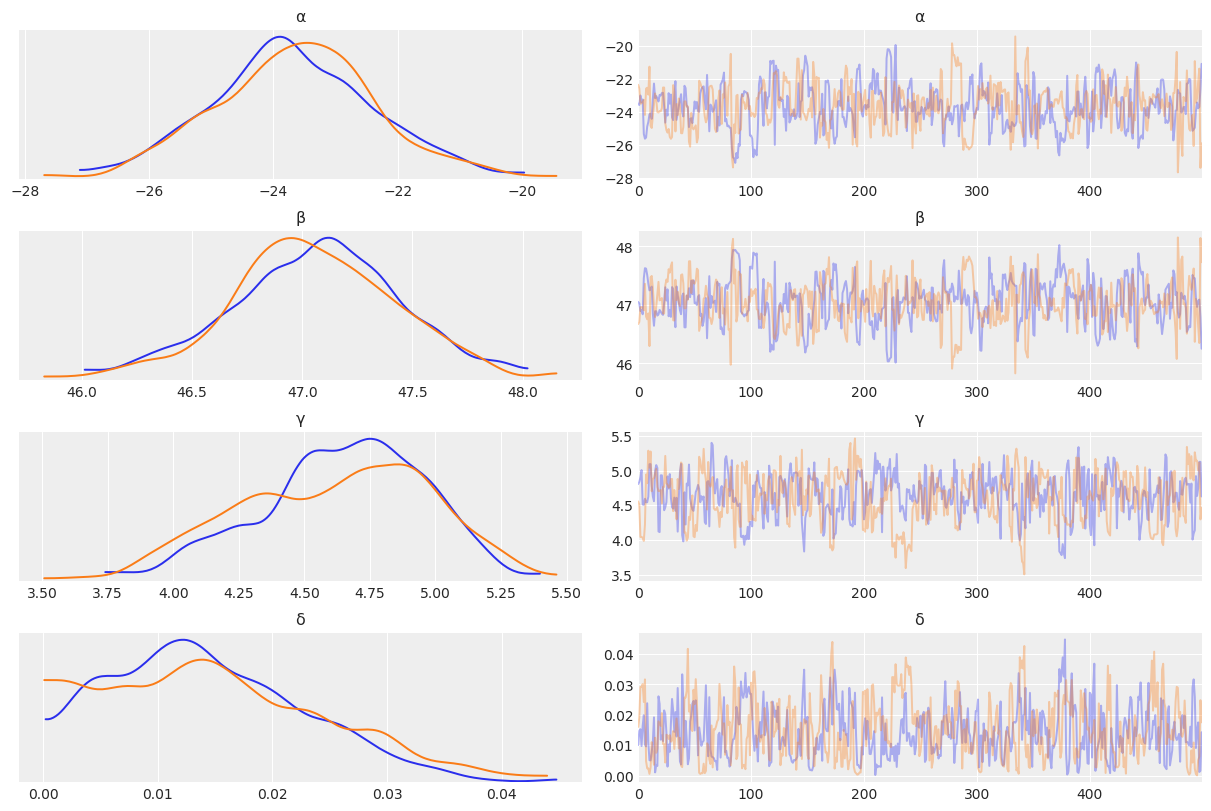

In [58]:
az.plot_trace(trace_heights, var_names = ["Œ±","Œ≤", "Œ≥", "Œ¥"]);

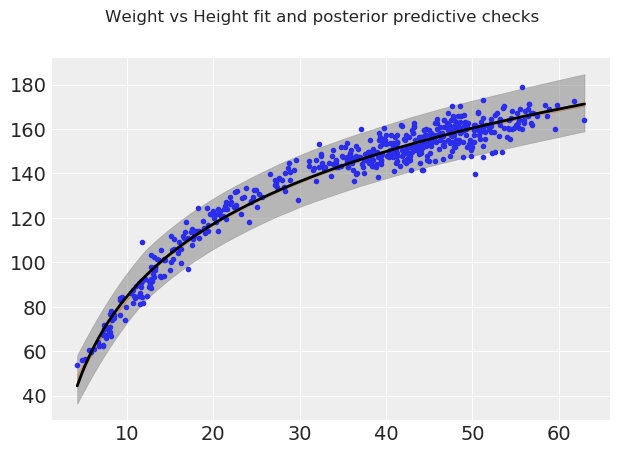

In [60]:
fig, ax = plt.subplots()

ax.plot(weight, height, "C0.")
Œº_m = trace_heights["Œº"].mean(0)

order = np.argsort(weight)  #ËøîÂõûÁöÑÊòØÊï∞ÁªÑÂÄº‰ªéÂ∞èÂà∞Â§ßÁöÑÁ¥¢ÂºïÂÄº 
ax.plot(weight[order], Œº_m[order], c="k")
#ax.plot(weight, Œº_m, c="k")
az.plot_hpd(weight, trace_heights["Œº"], credible_interval=.98)
az.plot_hpd(weight, ppc_heights["height_pred"], credible_interval=.98, color="gray")

fig.suptitle("Weight vs Height fit and posterior predictive checks");

Let's also plot the noise as a function of weight:

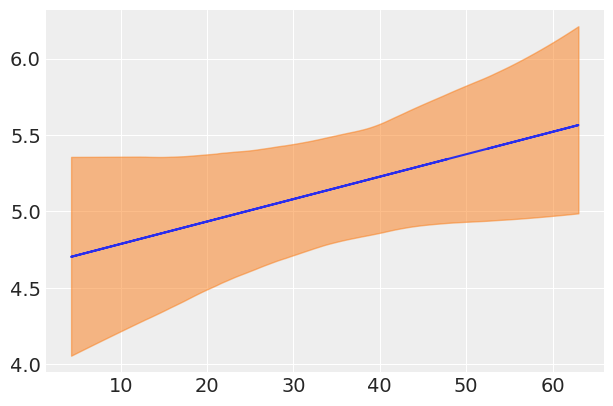

In [38]:
fig, ax = plt.subplots()
ax.plot(weight, trace_heights["œµ"].mean(0))
az.plot_hpd(weight, trace_heights["œµ"], credible_interval=.98);

We can see that in lower weight ranges there tends to be less variability in height than for bigger weight ranges (i.e when people are older). This makes sense intuitively, as humans start out roughly the same in their earlier years, and tend to become more different in physical dimensions as they grow older in age and weight.Êàë‰ª¨ÂèØ‰ª•ÁúãÂà∞ÔºåÂú®ËæÉ‰ΩéÁöÑ‰ΩìÈáçËåÉÂõ¥ÂÜÖÔºåË∫´È´òÁöÑÂèòÂºÇÊÄßÂæÄÂæÄÊØîËæÉÂ§ßÁöÑ‰ΩìÈáçËåÉÂõ¥ÂÜÖÔºàÂç≥ÔºåËÄÅÂπ¥‰∫∫ÔºâÊõ¥Â∞è„ÄÇ ‰ªéÁõ¥Ëßâ‰∏äËÆ≤ËøôÊòØÊúâÈÅìÁêÜÁöÑÔºåÂõ†‰∏∫‰∫∫Á±ªÂú®ÂºÄÂßãÊó∂ÁöÑÂπ¥ÈæÑÂ§ßËá¥Áõ∏ÂêåÔºåÂπ∂‰∏îÈöèÁùÄÂπ¥ÈæÑÂíå‰ΩìÈáçÁöÑÂ¢ûÈïøÔºåÂÖ∂Ë∫´‰ΩìÂ∞∫ÂØ∏‰ºöÂèòÂæóË∂äÊù•Ë∂ä‰∏çÂêå„ÄÇ

## Question 10
***

*It is known that for many species the weight does not scale with the height, but with the logarithm of the weight. Use this information to fit the howell data (including subjects from all ages). Do one more model, this time without using the logarithm but instead a second order polynomial. Compare and explain both results.*‰ºóÊâÄÂë®Áü•ÔºåÂØπ‰∫éËÆ∏Â§öÁâ©ÁßçÔºåÈáçÈáèÂπ∂‰∏çÈöèÈ´òÂ∫¶ÊàêÊØî‰æãÔºåËÄåÊòØÈöèÈáçÈáèÁöÑÂØπÊï∞ÊàêÊØî‰æã„ÄÇ ‰ΩøÁî®Ê≠§‰ø°ÊÅØÊù•ÊãüÂêàHowellÊï∞ÊçÆÔºàÂåÖÊã¨ÊâÄÊúâÂπ¥ÈæÑÊÆµÁöÑÂèóËØïËÄÖÔºâ„ÄÇ ÂÜçÂÅö‰∏Ä‰∏™Ê®°ÂûãÔºåËøôÊ¨°‰∏ç‰ΩøÁî®ÂØπÊï∞ÔºåËÄåÊòØ‰ΩøÁî®‰∫åÈò∂Â§öÈ°πÂºè„ÄÇ ÊØîËæÉÂπ∂Ëß£Èáä‰∏§‰∏™ÁªìÊûú„ÄÇ

We did the logarithm bit in the previous exercise, so let's directly fit the model with a 2nd order polynomial that follows this definition:
$$\mu = \alpha + \beta_0*x + \beta_1*x^2$$

Note that we could have used the dot product like in the `model_mlr` example, but in this model we chose to explicitly split out the terms.

In [61]:
with pm.Model() as heights_polynomial:
    Œ± = pm.Normal("Œ±", sd=10)
    Œ≤ = pm.Normal("Œ≤", sd=10, shape=2)
    Œ≥ = pm.HalfNormal("Œ≥", sd=10)
    Œ¥ = pm.HalfNormal("Œ¥", sd=10)
    
    weight_shared = shared(weight.values * 1.)
    
    Œº = pm.Deterministic("Œº", Œ± + Œ≤[0] * weight_shared + Œ≤[1] * weight_shared**2)
    œµ = pm.Deterministic("œµ", Œ≥ + Œ¥ * weight_shared)
    
    height_pred_polynomial = pm.Normal("height_pred", mu=Œº, sd=œµ, observed=height)
    trace_heights_polynomial = pm.sample(tune=2000)
    ppc_heights_polynomial = pm.sample_posterior_predictive(trace_heights_polynomial, samples=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Œ¥, Œ≥, Œ≤, Œ±]
Sampling 2 chains, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [00:38<00:00, 130.29draws/s]
The number of effective samples is smaller than 25% for some parameters.
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:03<00:00, 604.20it/s]


C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

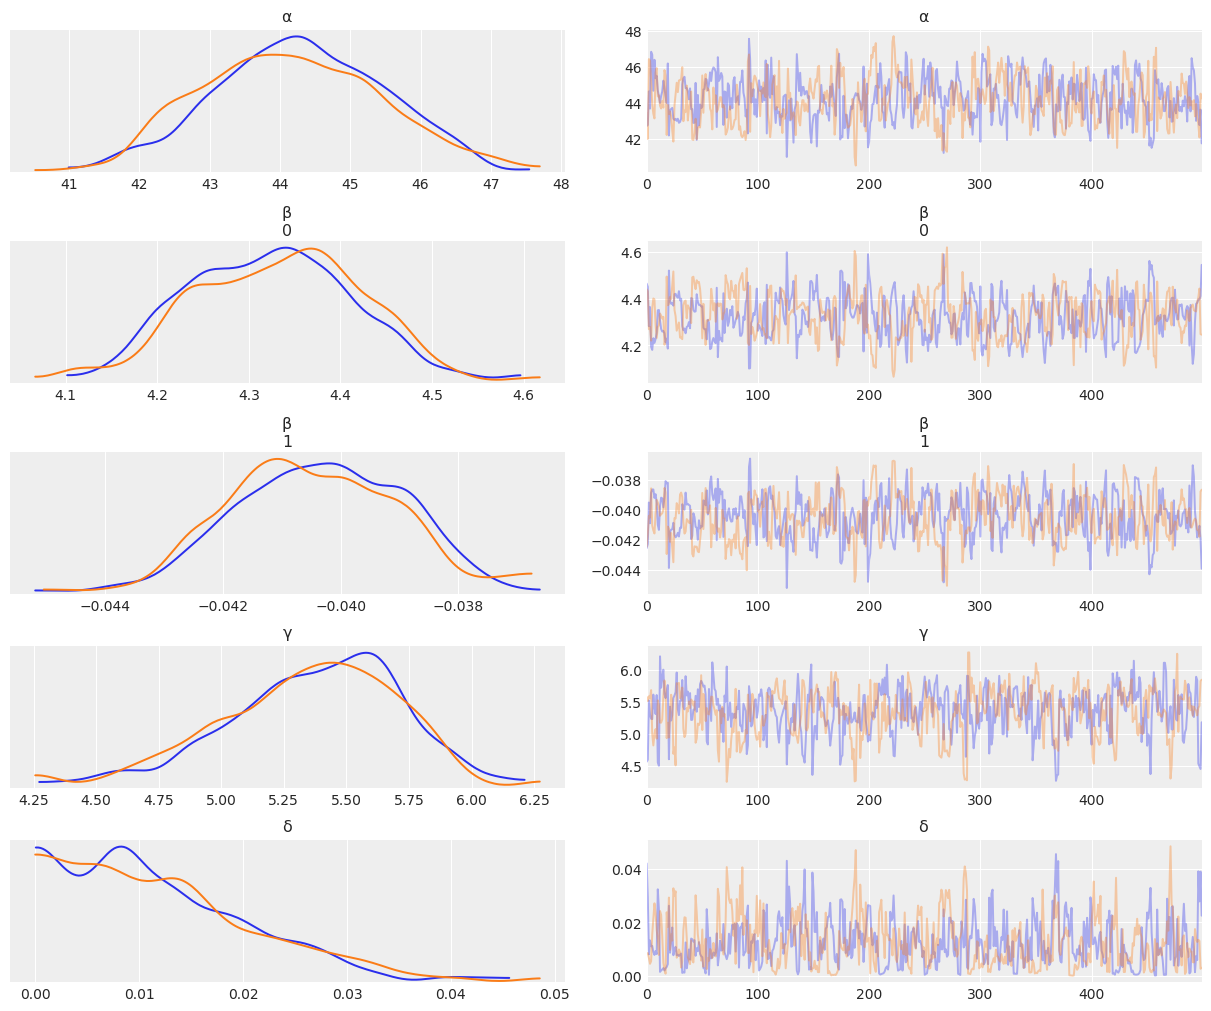

In [62]:
az.plot_trace(trace_heights_polynomial, var_names = ["Œ±","Œ≤", "Œ≥", "Œ¥"]);

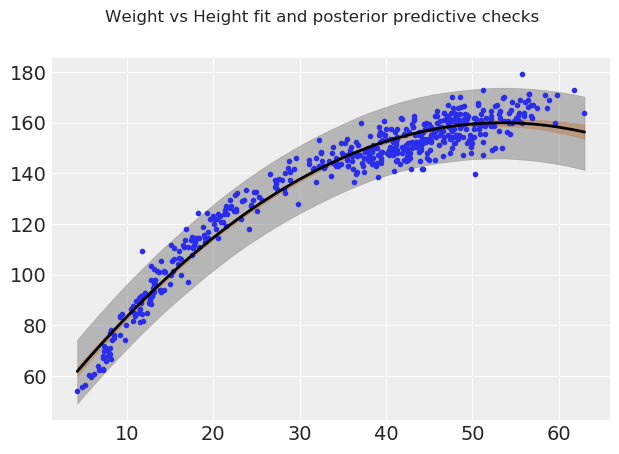

In [64]:
fig, ax = plt.subplots()

ax.plot(weight, height, "C0.")
Œº_m = trace_heights_polynomial["Œº"].mean(0)
œµ_m = trace_heights_polynomial["œµ"].mean(0)
order = np.argsort(weight) 
ax.plot(weight[order], Œº_m[order], c="k")
az.plot_hpd(weight, trace_heights_polynomial["Œº"], credible_interval=.98)
az.plot_hpd(weight, ppc_heights_polynomial["height_pred"], credible_interval=.98, color="gray")
fig.suptitle("Weight vs Height fit and posterior predictive checks");

For weights up until around ~50 units, the polynomial fit looks good. However past that point the curve starts dropping. Inuitively this does not make sense. This phenonemon is not a property of our data, but of our model choice. Polynomial functions always have to make N-1 turns, where N is the degree of the polynomial. This doesn't necessarily make our model useless, it seems to do a good job in certain parts of the domain, but as a statistical modeler, it's up to you to understand the tools in your toolbox and the tradeoffs of each.ÂØπ‰∫éÁõ¥Âà∞Á∫¶50‰∏™Âçï‰ΩçÁöÑÊùÉÈáçÔºåÂ§öÈ°πÂºèÊãüÂêàÁúãËµ∑Êù•‰∏çÈîô„ÄÇ ‰ΩÜÊòØÔºåË∂ÖËøáËØ•ÁÇπÊó∂ÔºåÊõ≤Á∫øÂºÄÂßã‰∏ãÈôç„ÄÇ ÊúÄÂàùËøôÊòØÊ≤°ÊúâÈÅìÁêÜÁöÑ„ÄÇ ËøôÁßçÁé∞Ë±°‰∏çÊòØÊàë‰ª¨Êï∞ÊçÆÁöÑÂ±ûÊÄßÔºåËÄåÊòØÊàë‰ª¨Ê®°ÂûãÈÄâÊã©ÁöÑÂ±ûÊÄß„ÄÇ Â§öÈ°πÂºèÂáΩÊï∞ÊÄªÊòØÂøÖÈ°ªÊóãËΩ¨N-1Ê¨°ÔºåÂÖ∂‰∏≠NÊòØÂ§öÈ°πÂºèÁöÑÊ¨°Êï∞„ÄÇ ËøôÂπ∂‰∏ç‰∏ÄÂÆö‰ºö‰ΩøÊàë‰ª¨ÁöÑÊ®°ÂûãÂ§±ÊïàÔºåÂÆÉ‰ºº‰πéÂú®ËØ•È¢ÜÂüüÁöÑÊüê‰∫õÈÉ®ÂàÜÂÅöÂæóÂæàÂ•ΩÔºå‰ΩÜÊòØ‰Ωú‰∏∫ÁªüËÆ°Âª∫Ê®°ËÄÖÔºåÊÇ®ÈúÄË¶Å‰∫ÜËß£Â∑•ÂÖ∑ÁÆ±‰∏≠ÁöÑÂ∑•ÂÖ∑‰ª•ÂèäÊØè‰∏™Â∑•ÂÖ∑ÁöÑÂèñËàç„ÄÇ

## Question 11
***

*Think about a model that's able to fit the first three dataset from the Anscombe quartet. Also, think about a model to fit the fourth dataset.*ËÄÉËôë‰∏Ä‰∏™ËÉΩÂ§üÈÄÇÂêàAnscombeÂõõÈáçÂ•èÁöÑÂâç‰∏â‰∏™Êï∞ÊçÆÈõÜÁöÑÊ®°Âûã„ÄÇ Âè¶Â§ñÔºåËÄÉËôë‰∏Ä‰∏™ÈÄÇÂêàÁ¨¨Âõõ‰∏™Êï∞ÊçÆÈõÜÁöÑÊ®°Âûã„ÄÇ

Below are all four datasets from Anscombe's Quartet  
![title](images/640px-Anscombe.png)

A model that might fit the first three models is a polynomial regression of the form:

$ y = \alpha_2  x^2 + \alpha_1 x + \alpha_0 $

For the more linear datasets the model could have a low value for $\alpha_2$, and for the second dataset the model would be able to fit the non linearity.
ÂØπ‰∫éÊõ¥Á∫øÊÄßÁöÑÊï∞ÊçÆÈõÜÔºåËØ•Ê®°ÂûãÁöÑ$ \ alpha_2 $ÂÄºÂèØËÉΩËæÉ‰ΩéÔºåËÄåÂØπ‰∫éÁ¨¨‰∫å‰∏™Êï∞ÊçÆÈõÜÔºåËØ•Ê®°ÂûãÂ∞ÜËÉΩÂ§üÊãüÂêàÈùûÁ∫øÊÄßÂÄº„ÄÇ

For the last dataset there seems to be two distinct patterns, a cluster of points at x=8 and one at x=19. We could model this one with two groups as follows:ÂØπ‰∫éÊúÄÂêé‰∏Ä‰∏™Êï∞ÊçÆÈõÜÔºå‰ºº‰πéÊúâ‰∏§Áßç‰∏çÂêåÁöÑÊ®°ÂºèÔºåÂç≥x = 8Â§ÑÁöÑÁÇπÁ∞áÂíåx = 19Â§ÑÁöÑÁÇπÁ∞á„ÄÇ Êàë‰ª¨ÂèØ‰ª•Áî®‰∏§‰∏™ÁªÑÂØπÊ≠§Ê®°ÂûãËøõË°åÂª∫Ê®°ÔºåÂ¶Ç‰∏ãÊâÄÁ§∫Ôºö

In [65]:
df = pd.read_csv(os.path.join("..", "code", "data", "anscombe.csv"))
df = df.loc[df["group"] == "IV", ["x", "y"]]

In [66]:
idx = (df["x"] == 8).astype(int)
idx

33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    0
41    1
42    1
43    1
Name: x, dtype: int32

In [67]:
df["y"].values

array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
        7.91,  6.89])

In [68]:
with pm.Model() as anscombe:
    
    # Two groups of points with independent parameters
    mu = pm.Normal("mu", sd=10, shape=2)
    sd = pm.HalfNormal("sd", sd=10)
    
    y = pm.Normal("y", mu=mu[idx], sd=sd, observed=df["y"].values)
    
    trace_4 = pm.sample(draws=10000)
    ppc = pm.sample_posterior_predictive(trace_4)

C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]
Sampling 2 chains, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

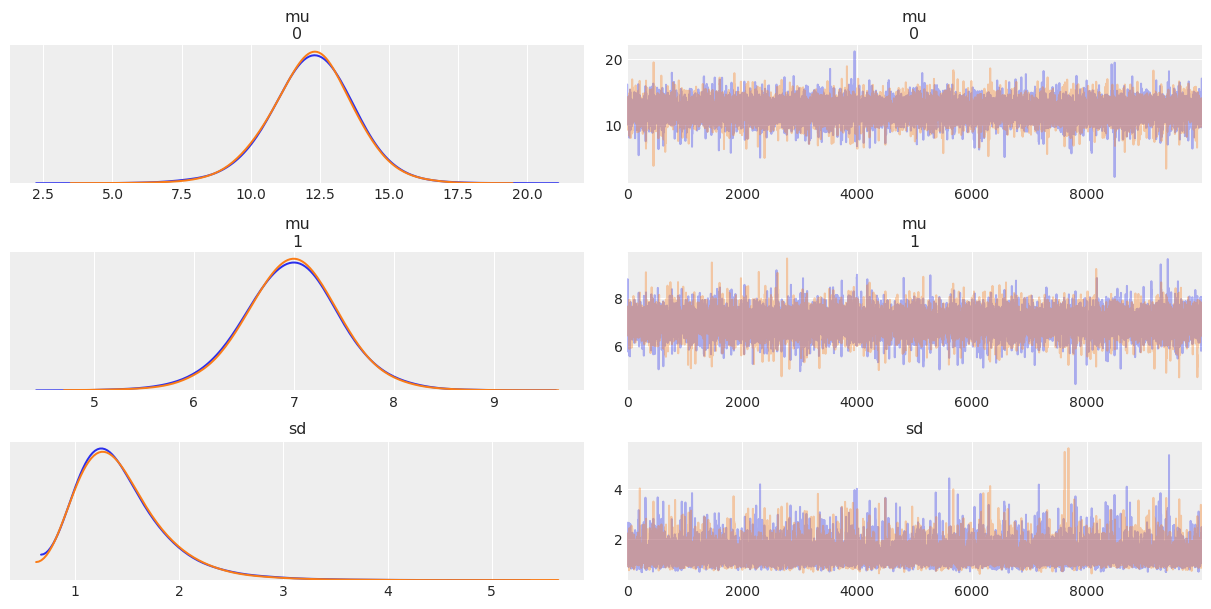

In [69]:
az.plot_trace(trace_4);

## Question 12
***

*See in the code accompanying the book the `model_t2` (and the data associated with it). Experiment with priors for $\nu$, like the non-shifted exponential and gamma priors (they are commented in the code below). Plot the prior distribution, to ensure that you understand them. An easy way to do this is to just comment the likelihood in the model and check the trace plot. A more efficient way though is to use the `pm.sample_prior_predictive()` function instead of `pm.sample()`.*ËØ∑ÂèÇÈòÖÊú¨‰π¶ÈöèÈôÑÁöÑ‰ª£Á†Å‰∏≠ÁöÑmodel_t2Ôºà‰ª•Âèä‰∏é‰πãÂÖ≥ËÅîÁöÑÊï∞ÊçÆÔºâ„ÄÇ ‰ΩøÁî®priorÁöÑÂÖàÈ™åËøõË°åËØïÈ™åÔºå‰æãÂ¶ÇÈùûÁßª‰ΩçÊåáÊï∞Âíå‰ºΩÁéõÂÖàÈ™åÔºàÂÆÉ‰ª¨Âú®‰∏ãÈù¢ÁöÑ‰ª£Á†Å‰∏≠ËøõË°å‰∫ÜÊ≥®ÈáäÔºâ„ÄÇ ÁªòÂà∂ÂÖàÈ™åÂàÜÂ∏ÉÂõæÔºå‰ª•Á°Æ‰øùÊÇ®ÁêÜËß£ÂÆÉ‰ª¨„ÄÇ ‰∏ÄÁßçÁÆÄÂçïÁöÑÊñπÊ≥ïÊòØÂú®Ê®°Âûã‰∏≠Ê≥®ÈáäÂèØËÉΩÊÄßÂπ∂Ê£ÄÊü•ËøπÁ∫øÂõæ„ÄÇ ‰ΩÜÊòØÔºåÊõ¥ÊúâÊïàÁöÑÊñπÊ≥ïÊòØ‰ΩøÁî®pm.sample_prior_predictiveÔºàÔºâÂáΩÊï∞ËÄå‰∏çÊòØpm.sampleÔºàÔºâ„ÄÇ

In [61]:
ans = pd.read_csv('../code/data/anscombe.csv')

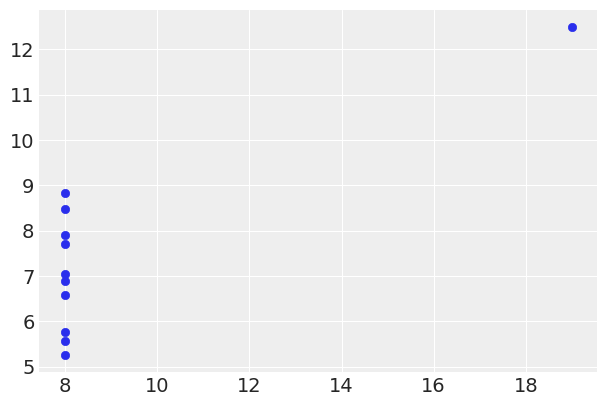

In [64]:
plt.scatter(x_4,y_4)

In [63]:
x_4 = ans[ans.group == 'IV']['x'].values
y_4 = ans[ans.group == 'IV']['y'].values

with pm.Model() as model_t2:
    Œ± = pm.Normal('Œ±', mu=0, sd=100)
    Œ≤ = pm.Normal('Œ≤', mu=0, sd=1)
    œµ = pm.HalfCauchy('œµ', 5)
    ŒΩ = pm.Exponential('ŒΩ', 1/30)
    # ŒΩ = pm.Gamma('ŒΩ', mu=20, sd=15)
    # ŒΩ = pm.Gamma('ŒΩ', 2, 0.1)

    y_pred = pm.StudentT('y_pred', mu=Œ± + Œ≤ * x_4, sd=œµ, nu=ŒΩ, observed=y_4)
    
    prior_v_exp = pm.sample_prior_predictive(2000)
    trace_v_exp = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ŒΩ, œµ, Œ≤, Œ±]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2500/2500 [00:09<00:00, 260.33it/s]


In [65]:
data_exp = az.from_pymc3(trace=trace_v_exp, prior=prior_v_exp)

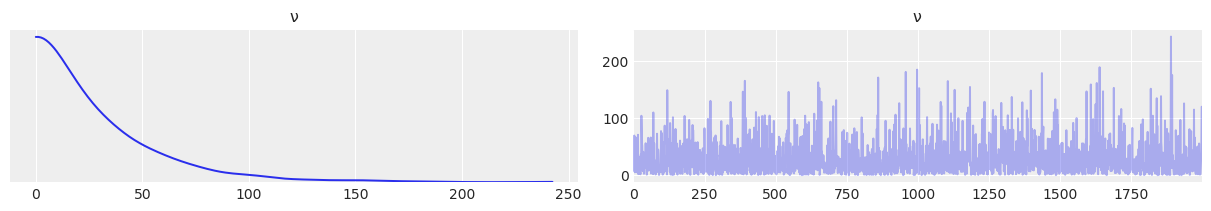

In [66]:
az.plot_trace(data_exp.prior, var_names=["ŒΩ"]);

In [68]:
with pm.Model() as model_t2:
    Œ± = pm.Normal('Œ±', mu=0, sd=100)
    Œ≤ = pm.Normal('Œ≤', mu=0, sd=1)
    œµ = pm.HalfCauchy('œµ', 5)
    # ŒΩ = pm.Exponential('ŒΩ', 1/30)
    ŒΩ = pm.Gamma('ŒΩ', mu=20, sd=15)
    #ŒΩ = pm.Gamma('ŒΩ', 2, 0.1)

    y_pred = pm.StudentT('y_pred', mu=Œ± + Œ≤ * x_4, sd=œµ, nu=ŒΩ, observed=y_4)
    
    prior_v20_15 = pm.sample_prior_predictive(2000)
    trace_v_20 = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ŒΩ, œµ, Œ≤, Œ±]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2500/2500 [00:09<00:00, 275.61it/s]


In [69]:
data_20 = az.from_pymc3(trace=trace_v_20, prior=prior_v20_15)

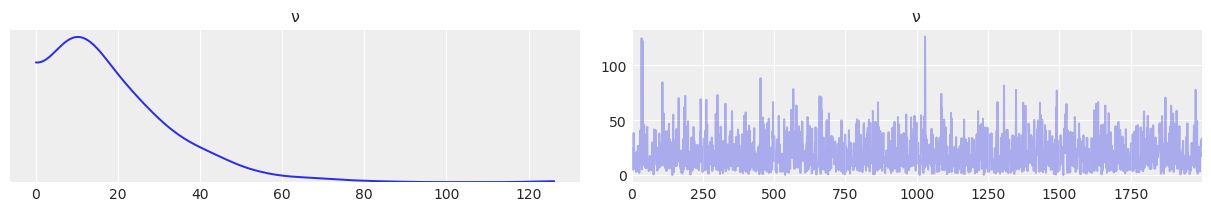

In [70]:
az.plot_trace(data_20.prior, var_names=["ŒΩ"]);

In [71]:
with pm.Model() as model_t2:
    Œ± = pm.Normal('Œ±', mu=0, sd=100)
    Œ≤ = pm.Normal('Œ≤', mu=0, sd=1)
    œµ = pm.HalfCauchy('œµ', 5)
    # ŒΩ = pm.Exponential('ŒΩ', 1/30)
    # ŒΩ = pm.Gamma('ŒΩ', mu=20, sd=15)
    ŒΩ = pm.Gamma('ŒΩ', 2, 0.1)

    y_pred = pm.StudentT('y_pred', mu=Œ± + Œ≤ * x_4, sd=œµ, nu=ŒΩ, observed=y_4)
    
    prior_v2_01 = pm.sample_prior_predictive(2000)
    trace_v_2_01 = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ŒΩ, œµ, Œ≤, Œ±]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2500/2500 [00:09<00:00, 262.84it/s]


In [72]:
data_2 = az.from_pymc3(trace=trace_v_2_01, prior=prior_v2_01)

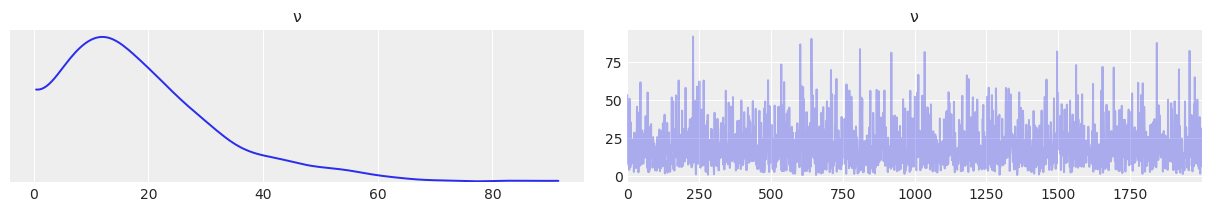

In [73]:
az.plot_trace(data_2.prior, var_names=["ŒΩ"]);

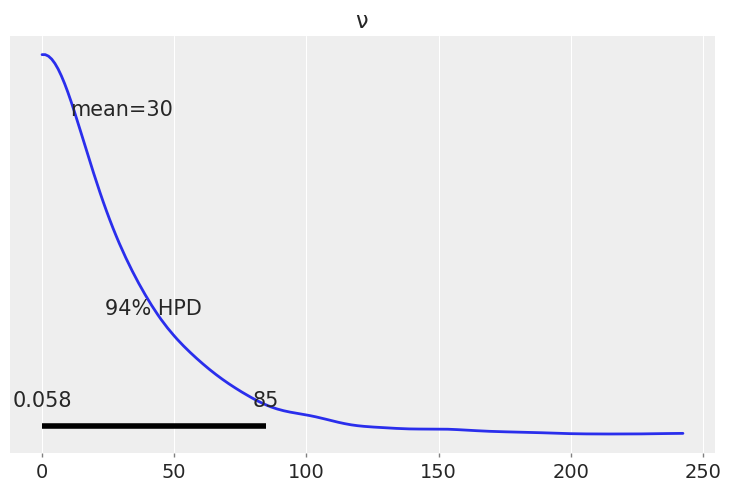

In [74]:
az.plot_posterior(data_exp.prior, var_names=["ŒΩ"]);

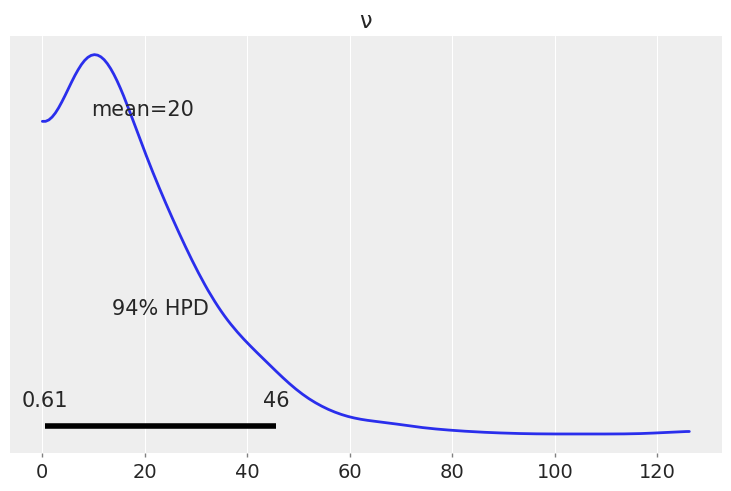

In [75]:
az.plot_posterior(data_20.prior, var_names=["ŒΩ"]);

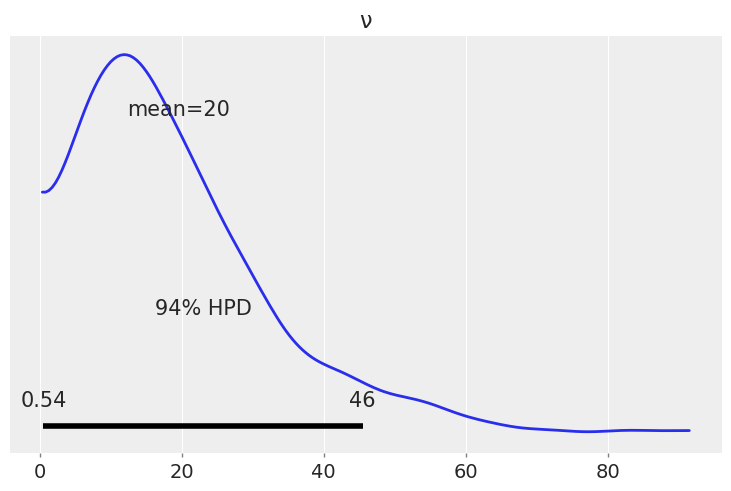

In [76]:
az.plot_posterior(data_2.prior, var_names=["ŒΩ"]);

In [77]:
az.summary(trace_v_20)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±   3.091   1.441   0.479    5.896      0.036    0.028    1561.0  1342.0   
Œ≤   0.491   0.153   0.207    0.777      0.004    0.003    1612.0  1488.0   
œµ   1.394   0.420   0.747    2.166      0.010    0.007    1638.0  1637.0   
ŒΩ  21.718  14.979   1.836   48.521      0.334    0.259    2012.0  1675.0   

   ess_bulk  ess_tail  r_hat  
Œ±    1649.0    1602.0    1.0  
Œ≤    1718.0    1493.0    1.0  
œµ    1506.0    1180.0    1.0  
ŒΩ    2109.0    2078.0    1.0

In [78]:
az.summary(trace_v_2_01)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±   3.130   1.453   0.385    5.844      0.036    0.026    1603.0  1531.0   
Œ≤   0.484   0.152   0.202    0.782      0.004    0.003    1617.0  1617.0   
œµ   1.404   0.437   0.718    2.151      0.012    0.009    1284.0  1284.0   
ŒΩ  21.884  14.417   1.405   47.237      0.330    0.240    1912.0  1808.0   

   ess_bulk  ess_tail  r_hat  
Œ±    1645.0    1482.0    1.0  
Œ≤    1665.0    1465.0    1.0  
œµ    1242.0    1344.0    1.0  
ŒΩ    1820.0    1741.0    1.0

In [79]:
az.summary(trace_v_exp)

mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±   3.066   1.407   0.495    5.839      0.034    0.024    1687.0  1687.0   
Œ≤   0.492   0.148   0.213    0.783      0.004    0.003    1720.0  1602.0   
œµ   1.383   0.405   0.765    2.147      0.010    0.007    1707.0  1707.0   
ŒΩ  34.787  29.983   0.782   88.561      0.588    0.416    2597.0  2597.0   

   ess_bulk  ess_tail  r_hat  
Œ±    1733.0    1594.0    1.0  
Œ≤    1826.0    1581.0    1.0  
œµ    1660.0    1526.0    1.0  
ŒΩ    2088.0    1858.0    1.0

## Question 13
***

*For the `unpooled_model`, change the value of `sd` for the $\beta$ prior. Try values of 1 and 100. Explore how the estimated slopes change for each group. Which group is more affected by this change?*ÂØπ‰∫éunpooled_modelÔºåËØ∑Êõ¥ÊîπùõΩÁöÑsdÂÄº„ÄÇ Â∞ùËØïÂ∞ÜÂÄºËÆæÁΩÆ‰∏∫1Âíå100„ÄÇÊé¢Á¥¢ÊØè‰∏™ÁªÑÁöÑ‰º∞ËÆ°ÊñúÁéáÂ¶Ç‰ΩïÂèòÂåñ„ÄÇ Âì™‰∏™ÁªÑÂèóÊ≠§Êõ¥ÊîπÁöÑÂΩ±ÂìçÊõ¥Â§ßÔºü

In [80]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)

alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real
x_centered = x_m - x_m.mean()

Let's loop through a couple standard deviation values for the slope parameter of each group:

In [82]:
sd_values = [1, 10, 100]
all_traces = {}  #Â≠óÂÖ∏

for sd_value in sd_values:
    with pm.Model() as unpooled_model:
        Œ±_tmp = pm.Normal('Œ±_tmp', mu=0, sd=10, shape=M)
        Œ≤ = pm.Normal('Œ≤', mu=0, sd=sd_value, shape=M)
        
        œµ = pm.HalfCauchy('œµ', 5)
        ŒΩ = pm.Exponential('ŒΩ', 1/30)

        y_pred = pm.StudentT('y_pred', mu=Œ±_tmp[idx] + Œ≤[idx] * x_centered,
                             sd=œµ, nu=ŒΩ, observed=y_m)

        Œ± = pm.Deterministic('Œ±', Œ±_tmp - Œ≤ * x_m.mean())

        unpooled_model_trace = pm.sample(2000,cores=1)
        all_traces[sd_value] = unpooled_model_trace   #Â≠óÂÖ∏Êî∂ÂÄº

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ŒΩ, œµ, Œ≤, Œ±_tmp]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2500/2500 [00:08<00:00, 289.44it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ŒΩ, œµ, Œ≤, Œ±_tmp]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2500/2500 [00:12<00:00, 195.59it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ŒΩ, œµ, Œ≤, Œ±_tmp]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

In [87]:
all_traces[10]

<MultiTrace: 2 chains, 2000 iterations, 7 variables>

In [88]:
all_summaries = []
for sd, trace in all_traces.items():
    summary = az.summary(az.from_pymc3(trace=trace))
    summary["group"] =  f"sd_{sd}"
    summary.reset_index(inplace=True)
    #summary. = summary.index +
    all_summaries.append(summary)
    
summaries_df = pd.concat(all_summaries)

In [89]:
beta = summaries_df[summaries_df["index"].str.contains("Œ≤")]
beta = beta[["group", "mean","index"]]

In [90]:
summaries_df[summaries_df["index"].str.contains("Œ≤")]

index   mean       sd   hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  \
8   Œ≤[0]  0.889    0.076    0.754    1.037      0.001    0.001    9525.0   
9   Œ≤[1]  0.868    0.114    0.651    1.080      0.001    0.001    9612.0   
10  Œ≤[2]  0.587    0.124    0.365    0.817      0.001    0.001    8509.0   
11  Œ≤[3]  0.697    0.088    0.526    0.856      0.001    0.001   10198.0   
12  Œ≤[4]  0.857    0.129    0.618    1.100      0.001    0.001    8695.0   
13  Œ≤[5]  0.669    0.102    0.470    0.850      0.001    0.001    9805.0   
14  Œ≤[6]  0.976    0.090    0.806    1.139      0.001    0.001    6219.0   
15  Œ≤[7]  0.002    0.983   -1.757    1.880      0.010    0.018    9443.0   
8   Œ≤[0]  0.894    0.078    0.745    1.037      0.001    0.001    6848.0   
9   Œ≤[1]  0.879    0.116    0.661    1.097      0.001    0.001    9465.0   
10  Œ≤[2]  0.594    0.122    0.371    0.835      0.001    0.001    8440.0   
11  Œ≤[3]  0.699    0.087    0.538    0.863      0.001    0.001    7881.0   
12  Œ≤[4]  0.875    0.130    0.638    1.119      0.001    0.001    8268.0   
13  Œ≤[5]  0.678    0.105    0.467    0.865      0.001    0.001   11684.0   
14  Œ≤[6]  0.984    0.090    0.814    1.149      0.001    0.001    8988.0   
15  Œ≤[7]  0.312   10.010  -18.641   19.094      0.102    0.171    9541.0   
8   Œ≤[0]  0.893    0.073    0.759    1.033      0.001    0.001    5538.0   
9   Œ≤[1]  0.877    0.113    0.676    1.101      0.002    0.001    5196.0   
10  Œ≤[2]  0.596    0.126    0.348    0.810      0.002    0.001    5876.0   
11  Œ≤[3]  0.700    0.090    0.525    0.858      0.001    0.001    4897.0   
12  Œ≤[4]  0.874    0.127    0.641    1.115      0.002    0.001    5935.0   
13  Œ≤[5]  0.679    0.103    0.497    0.882      0.001    0.001    5944.0   
14  Œ≤[6]  0.985    0.089    0.824    1.155      0.001    0.001    5907.0   
15  Œ≤[7]  6.807  103.030 -178.312  210.795      1.689    1.810    3720.0   

     ess_sd  ess_bulk  ess_tail  r_hat   group  
8    9411.0    9457.0    3054.0    1.0    sd_1  
9    8840.0    9640.0    2740.0    1.0    sd_1  
10   7920.0    8443.0    3069.0    1.0    sd_1  
11   9398.0   10203.0    2443.0    1.0    sd_1  
12   8437.0    8660.0    3081.0    1.0    sd_1  
13   9349.0    9773.0    2899.0    1.0    sd_1  
14   6184.0    6233.0    3157.0    1.0    sd_1  
15   1494.0    9382.0    3015.0    1.0    sd_1  
8    6713.0    6832.0    2624.0    1.0   sd_10  
9    8911.0    9477.0    3040.0    1.0   sd_10  
10   7810.0    8435.0    3286.0    1.0   sd_10  
11   7610.0    7898.0    3096.0    1.0   sd_10  
12   7902.0    8290.0    2836.0    1.0   sd_10  
13  10939.0   11727.0    3052.0    1.0   sd_10  
14   8825.0    9048.0    3226.0    1.0   sd_10  
15   1710.0    9526.0    3238.0    1.0   sd_10  
8    5538.0    5560.0    2961.0    1.0  sd_100  
9    5196.0    5183.0    2786.0    1.0  sd_100  
10   5780.0    5877.0    2907.0    1.0  sd_100  
11   4897.0    4899.0    2853.0    1.0  sd_100  
12   5755.0    5943.0    2823.0    1.0  sd_100  
13   5777.0    5894.0    2657.0    1.0  sd_100  
14   5825.0    5878.0    2458.0    1.0  sd_100  
15   1620.0    3719.0    2299.0    1.0  sd_100

In [91]:
beta

group   mean index
8     sd_1  0.889  Œ≤[0]
9     sd_1  0.868  Œ≤[1]
10    sd_1  0.587  Œ≤[2]
11    sd_1  0.697  Œ≤[3]
12    sd_1  0.857  Œ≤[4]
13    sd_1  0.669  Œ≤[5]
14    sd_1  0.976  Œ≤[6]
15    sd_1  0.002  Œ≤[7]
8    sd_10  0.894  Œ≤[0]
9    sd_10  0.879  Œ≤[1]
10   sd_10  0.594  Œ≤[2]
11   sd_10  0.699  Œ≤[3]
12   sd_10  0.875  Œ≤[4]
13   sd_10  0.678  Œ≤[5]
14   sd_10  0.984  Œ≤[6]
15   sd_10  0.312  Œ≤[7]
8   sd_100  0.893  Œ≤[0]
9   sd_100  0.877  Œ≤[1]
10  sd_100  0.596  Œ≤[2]
11  sd_100  0.700  Œ≤[3]
12  sd_100  0.874  Œ≤[4]
13  sd_100  0.679  Œ≤[5]
14  sd_100  0.985  Œ≤[6]
15  sd_100  6.807  Œ≤[7]

In [91]:
beta_p = beta.pivot(index="group", columns="index")
beta_p.columns = beta_p.columns.droplevel(0)
beta_p.reset_index(inplace=True)
beta_p

index   group   Œ≤[0]   Œ≤[1]   Œ≤[2]   Œ≤[3]   Œ≤[4]   Œ≤[5]   Œ≤[6]    Œ≤[7]
0        sd_1  0.889  0.868  0.585  0.696  0.859  0.671  0.977   0.010
1       sd_10  0.893  0.877  0.597  0.699  0.872  0.678  0.986   0.039
2      sd_100  0.894  0.880  0.596  0.701  0.871  0.678  0.985  11.219

In [ ]:
‰∏ªË¶ÅËß£ÂÜ≥‰∫ÜÂú®Â§öÁª¥ÔºàÂ§ß‰∫é‰∏âÁª¥ÔºâÊÉÖÂÜµ‰∏ãÊï∞ÊçÆÁâπÂæÅÊó†Ê≥ïÂèØËßÜÂåñÁöÑÈóÆÈ¢ò„ÄÇÂõæÁßçÊØè‰∏™Á´ñÁ∫ø‰ª£Ë°®‰∏Ä‰∏™ÁâπÂæÅÔºå‰∏äÈù¢ÁöÑÁÇπ‰ª£Ë°®ËØ•ÁâπÂæÅÁöÑÂÄºÔºåÊØè‰∏™Ê†∑Êú¨Ë°®Á§∫Âá∫Êù•Â∞±ÊòØ‰∏Ä‰∏™Ë¥ØÁ©øÊâÄÊúâÁ´ñÁ∫øÁöÑÊäòÁ∫øÂõæ„ÄÇ

‰∏ÄËà¨Êù•ËØ¥ÔºåÁî®‰∏çÂêåÁöÑÈ¢úËâ≤‰ª£Ë°®‰∏çÂêåÁöÑÁ±ªÂà´ÔºåËøôÊ†∑ÂèØ‰ª•Êñπ‰æøÁöÑÁúãÂá∫‰∏çÂêåÁâπÂæÅÂØπÂàÜÁ±ªÁöÑÂΩ±Âìç„ÄÇ

Êúâ‰ª•‰∏ã‰∏§‰∏™ÂéüÂàô;

‰∏ªË¶ÅÁúãÁõ∏ÂêåÈ¢úËâ≤ÁöÑÊäòÁ∫øÊòØÂê¶ÈõÜ‰∏≠ÔºåËã•Âú®Êüê‰∏™Â±ûÊÄß‰∏äÁõ∏ÂêåÈ¢úËâ≤ÊäòÁ∫øËæÉ‰∏∫ÈõÜ‰∏≠Ôºå‰∏çÂêåÈ¢úËâ≤Êúâ‰∏ÄÂÆöÁöÑÈó¥Ë∑ùÔºåÂàôËØ¥ÊòéËØ•Â±ûÊÄßÂØπ‰∫éÈ¢ÑÊµãÊ†áÁ≠æÁ±ªÂà´ÊúâËæÉÂ§ßÁöÑÂ∏ÆÂä©.
Ëã•Êüê‰∏™Â±ûÊÄß‰∏äÁ∫øÊù°Ê∑∑‰π±ÔºåÈ¢úËâ≤Ê∑∑ÊùÇÔºåÂàôËæÉÂ§ßÂèØËÉΩËØ•Â±ûÊÄßÂØπ‰∫éÊ†áÁ≠æÁ±ªÂà´Âà§ÂÆöÊ≤°Êúâ‰ª∑ÂÄº.

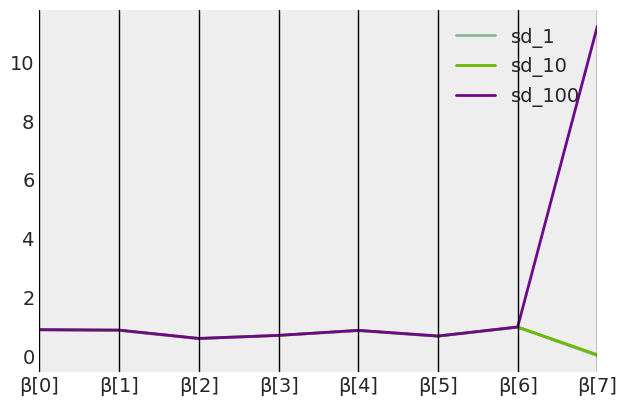

In [92]:
parallel_coordinates(beta_p, "group")

As we increase the standard deviation of the beta prior (the slope parameter), we see that for most of the groups the effect is neglible. However, for group 7 the prior has a strong effect on the posterior estimation because group 7 only has one data point and the unpooled model doesn't consider the datapoints in the other groups. There simply isn't enough data to "wash out" the prior distribution in this case.
414/5000
ÈöèÁùÄÊàë‰ª¨Â¢ûÂä†beta‰ºòÂÖàÁ∫ßÁöÑÊ†áÂáÜÂÅèÂ∑ÆÔºàÊñúÁéáÂèÇÊï∞ÔºâÔºåÊàë‰ª¨ÁúãÂà∞ÂØπ‰∫éÂ§ßÂ§öÊï∞ÁªÑËÄåË®ÄÔºåÊïàÊûúÂèØÂøΩÁï•‰∏çËÆ°„ÄÇ ‰ΩÜÊòØÔºåÂØπ‰∫éÁ¨¨7ÁªÑÔºåÂÖàÈ™åÂØπÂêéÈ™å‰º∞ËÆ°ÊúâÂæàÂ§ßÁöÑÂΩ±ÂìçÔºåÂõ†‰∏∫Á¨¨7ÁªÑÂè™Êúâ‰∏Ä‰∏™Êï∞ÊçÆÁÇπÔºåËÄåÈùûÊ±†ÂåñÊ®°ÂûãÂàô‰∏çËÄÉËôëÂÖ∂‰ªñÁªÑ‰∏≠ÁöÑÊï∞ÊçÆÁÇπ„ÄÇ Âú®ËøôÁßçÊÉÖÂÜµ‰∏ãÔºåÊ†πÊú¨Ê≤°ÊúâË∂≥Â§üÁöÑÊï∞ÊçÆÊù•‚ÄúÂÜ≤ÈîÄ‚ÄùÂÖàÈ™åÁöÑÂàÜÂ∏É

## Question 14
***

*Using the model `hierarchical_model`, repeat Figure 3.18, the one with the eight groups and the eight lines, but this time add the uncertainty to the linear fit.*Using the model hierarchical_model, repeat Figure 3.18, the one with the eight groups and the eight lines, but this time add the uncertainty to the linear fit.

In [4]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)

alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real

with pm.Model() as hierarchical_model:
    # hyper-priors
    Œ±_Œº_tmp = pm.Normal('Œ±_Œº_tmp', mu=0, sd=10)
    Œ±_œÉ_tmp = pm.HalfNormal('Œ±_œÉ_tmp', 10)
    Œ≤_Œº = pm.Normal('Œ≤_Œº', mu=0, sd=10)
    Œ≤_œÉ = pm.HalfNormal('Œ≤_œÉ', sd=10)

    # priors
    Œ±_tmp = pm.Normal('Œ±_tmp', mu=Œ±_Œº_tmp, sd=Œ±_œÉ_tmp, shape=M)
    Œ≤ = pm.Normal('Œ≤', mu=Œ≤_Œº, sd=Œ≤_œÉ, shape=M)
    œµ = pm.HalfCauchy('œµ', 5)
    ŒΩ = pm.Exponential('ŒΩ', 1/30)

    y_pred = pm.StudentT('y_pred', mu=Œ±_tmp[idx] + Œ≤[idx] * x_centered,
                         sd=œµ, nu=ŒΩ, observed=y_m)

    Œ± = pm.Deterministic('Œ±', Œ±_tmp - Œ≤ * x_m.mean())
    Œ±_Œº = pm.Deterministic('Œ±_Œº', Œ±_Œº_tmp - Œ≤_Œº * x_m.mean())
    Œ±_œÉ = pm.Deterministic('Œ±_sd', Œ±_œÉ_tmp - Œ≤_Œº * x_m.mean())

    trace_hm = pm.sample(1000,cores=1,target_accept=0.9)
    ppc_lines = pm.sample_posterior_predictive(trace_hm, samples=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ŒΩ, œµ, Œ≤, Œ±_tmp, Œ≤_œÉ, Œ≤_Œº, Œ±_œÉ_tmp, Œ±_Œº_tmp]
Sampling chain 1, 1 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1500/1500 [00:11<00:00, 131.27it/s]
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

In [5]:
trace_hm.get_values("Œ±").shape

(2000, 8)

In [6]:
alpha = trace_hm.get_values("Œ±")[369, 1]
beta = trace_hm.get_values("Œ≤")[369, 1]

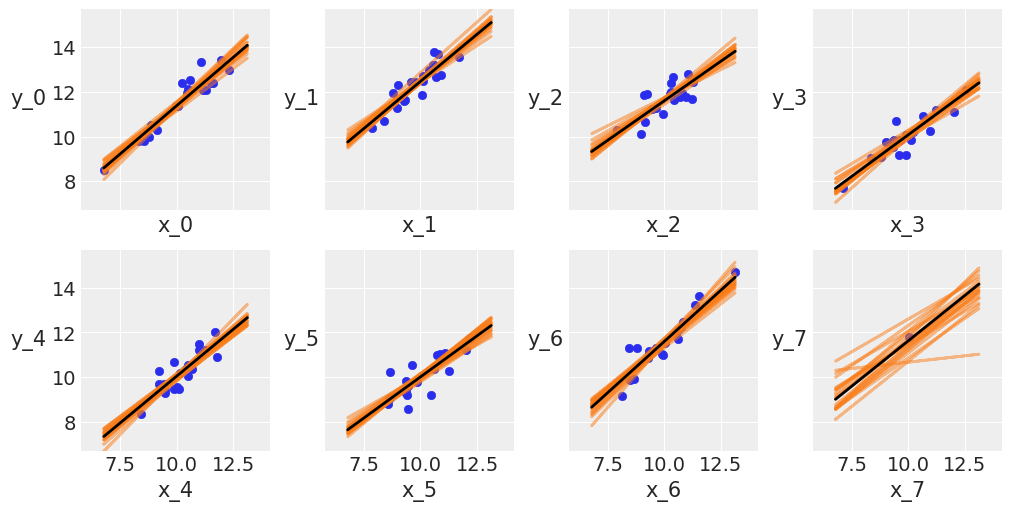

In [7]:
# Get 20 random samples for chain
chain_length =1000
random_draws = np.random.randint(0, chain_length-1, 20)

_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True,
                     constrained_layout=True)
ax = np.ravel(ax)
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', labelpad=17, rotation=0)
    
    #We add this one line to plot uncertainty. At least two data points must be present in group
    for random_draw in random_draws:
        alpha = trace_hm.get_values("Œ±")[random_draw, i]
        beta = trace_hm.get_values("Œ≤")[random_draw, i]
        ax[i].plot(x_m, alpha + beta*x_m, 'C1-', alpha=0.5)
        # ax[i].plot(x_m, alpha + beta*x_m)

    
    alpha_m = trace_hm['Œ±'][:, i].mean()
    beta_m = trace_hm['Œ≤'][:, i].mean()
    ax[i].plot(x_range, alpha_m + beta_m * x_range, c='k',
               label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N

## Question 15
***

*Re-run the `model_mlr` example, this time without centering the data. Compare the uncertainty in the $\alpha$ parameter for one case and the other. Can you explain these results?*ÈáçÊñ∞ËøêË°åmodel_mlrÁ§∫‰æãÔºåËøô‰∏ÄÊ¨°‰∏çÂ∞ÜÊï∞ÊçÆÂ±Ö‰∏≠„ÄÇ ÊØîËæÉ‰∏ÄÁßçÊÉÖÂÜµÂíåÂè¶‰∏ÄÁßçÊÉÖÂÜµ‰∏ãùõºÂèÇÊï∞ÁöÑ‰∏çÁ°ÆÂÆöÊÄß„ÄÇ ÊÇ®ËÉΩËß£ÈáäËøô‰∫õÁªìÊûúÂêóÔºü

*Tip: Remember the definition of the $\alpha$ parameter (also known as the intercept).*

In [96]:
np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=N)

X = np.array([np.random.normal(i, j, N) for i, j in zip([10, 2], [1, 1.5])]).T
X_mean = X.mean(axis=0, keepdims=True)
# X_centered = X - X_mean
y = alpha_real + np.dot(X, beta_real) + eps_real

In [99]:
with pm.Model() as model_mlr:
    Œ±_tmp = pm.Normal('Œ±_tmp', mu=0, sd=10)
    Œ≤ = pm.Normal('Œ≤', mu=0, sd=1, shape=2)
    œµ = pm.HalfCauchy('œµ', 5)

    Œº = Œ±_tmp + pm.math.dot(X, Œ≤)

    Œ± = pm.Deterministic('Œ±', Œ±_tmp - pm.math.dot(X_mean, Œ≤))

    y_pred = pm.Normal('y_pred', mu=Œº, sd=œµ, observed=y)

    trace_mlr = pm.sample(2000,cores=1,tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [œµ, Œ≤, Œ±_tmp]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4000/4000 [00:32<00:00, 122.14it/s]


In [100]:
az.summary(trace_mlr)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±_tmp   1.841  0.448   1.002    2.682      0.011    0.008    1528.0  1500.0   
Œ≤[0]    0.970  0.043   0.888    1.051      0.001    0.001    1563.0  1563.0   
Œ≤[1]    1.470  0.032   1.412    1.531      0.001    0.000    2934.0  2933.0   
œµ       0.474  0.035   0.410    0.539      0.001    0.001    2258.0  2230.0   
Œ±[0]  -10.917  0.892 -12.599   -9.243      0.023    0.016    1522.0  1522.0   

       ess_bulk  ess_tail  r_hat  
Œ±_tmp    1532.0    1766.0    1.0  
Œ≤[0]     1572.0    1824.0    1.0  
Œ≤[1]     2938.0    2448.0    1.0  
œµ        2274.0    2012.0    1.0  
Œ±[0]     1526.0    1769.0    1.0

In [15]:
az.summary(trace_mlr, var_names=['Œ±', 'Œ≤', 'œµ'])

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±[0] -10.885  0.908 -12.545   -9.129      0.024    0.017    1460.0  1451.0   
Œ≤[0]   0.968  0.044   0.882    1.048      0.001    0.001    1493.0  1486.0   
Œ≤[1]   1.470  0.033   1.410    1.531      0.001    0.000    2723.0  2719.0   
œµ      0.474  0.035   0.407    0.538      0.001    0.000    2618.0  2618.0   

      ess_bulk  ess_tail  r_hat  
Œ±[0]    1460.0    1750.0    1.0  
Œ≤[0]    1493.0    1817.0    1.0  
Œ≤[1]    2720.0    2312.0    1.0  
œµ       2592.0    1984.0    1.0

With the non-centered data, $\alpha$ changes to compensate for the position of the points. In other words, $\alpha$ needs to compensate $\beta X$ distance up or down since the $X$ values are no longer centered around the $y$ axis.ÂØπ‰∫éÈùû‰∏≠ÂøÉÊï∞ÊçÆÔºåùõºÊõ¥Êîπ‰ª•Ë°•ÂÅøÁÇπÁöÑ‰ΩçÁΩÆ„ÄÇ Êç¢Âè•ËØùËØ¥ÔºåÁî±‰∫éùëãÂÄº‰∏çÂÜçÂõ¥Áªïùë¶ËΩ¥Â±Ö‰∏≠ÔºåÂõ†Ê≠§ùõºÈúÄË¶ÅÂêë‰∏äÊàñÂêë‰∏ãË°•ÂÅøùõΩùëãË∑ùÁ¶ª„ÄÇÊú¨‰æãÂ≠ê‰∏≠ÔºåŒ±_tmpÂç≥ÊòØÊ≠£Â∏∏ÁöÑÊï∞ÊçÆ„ÄÇ

In [98]:
with pm.Model() as model_mlr1:
    a = pm.Normal('a', mu=0, sd=10)
    b = pm.Normal('b', mu=0, sd=1, shape=2)
    œµ = pm.HalfCauchy('œµ', 5)


    Œº = pm.Deterministic('Œº', a+ pm.math.dot(X, b))

    y_pred = pm.Normal('y_pred', mu=Œº, sd=œµ, observed=y)

    trace_mlr1 = pm.sample(2000,cores=1,tune=2000)
az.summary(trace_mlr1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [œµ, b, a]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4000/4000 [00:29<00:00, 136.14it/s]


mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
a       1.856  0.456   1.029    2.750      0.012    0.008    1466.0  1466.0   
b[0]    0.968  0.044   0.882    1.048      0.001    0.001    1493.0  1486.0   
b[1]    1.470  0.033   1.410    1.531      0.001    0.000    2723.0  2719.0   
œµ       0.474  0.035   0.407    0.538      0.001    0.000    2618.0  2618.0   
Œº[0]   16.677  0.065  16.550   16.791      0.001    0.001    3169.0  3169.0   
...       ...    ...     ...      ...        ...      ...       ...     ...   
Œº[95]  15.229  0.058  15.116   15.334      0.001    0.001    3073.0  3073.0   
Œº[96]  11.988  0.120  11.782   12.230      0.002    0.002    2808.0  2805.0   
Œº[97]  12.173  0.110  11.974   12.393      0.003    0.002    1651.0  1651.0   
Œº[98]  13.683  0.062  13.566   13.797      0.001    0.001    3419.0  3417.0   
Œº[99]  11.238  0.089  11.066   11.394      0.002    0.001    2956.0  2956.0   

       ess_bulk  ess_tail  r_hat  
a        1467.0    1726.0    1.0  
b[0]     1493.0    1817.0    1.0  
b[1]     2720.0    2312.0    1.0  
œµ        2592.0    1984.0    1.0  
Œº[0]     3168.0    3208.0    1.0  
...         ...       ...    ...  
Œº[95]    3088.0    2624.0    1.0  
Œº[96]    2813.0    2856.0    1.0  
Œº[97]    1657.0    1704.0    1.0  
Œº[98]    3429.0    3340.0    1.0  
Œº[99]    2948.0    3081.0    1.0  

[104 rows x 11 columns]

## Question 16
***

*Read and run [this notebook](https://docs.pymc.io/notebooks/LKJ.html) from PyMC3's documentation*

### Â§öÂÖÉÊ≠£ÊÄÅÊ®°ÂûãÁöÑLKJ CholeskyÂçèÊñπÂ∑ÆÂÖàÈ™å

ËôΩÁÑ∂WishartÈÄÜÂàÜÂ∏ÉÊòØÂ§öÂÖÉÊ≠£ÊÄÅÂàÜÂ∏ÉÂçèÊñπÂ∑ÆÁü©ÈòµÁöÑÂÖ±ËΩ≠ÂÖàÈ™åÔºå‰ΩÜÂÆÉÂπ∂‰∏çÂçÅÂàÜÈÄÇÂêàÁé∞‰ª£Ë¥ùÂè∂ÊñØËÆ°ÁÆóÊñπÊ≥ï„ÄÇ Âõ†Ê≠§ÔºåÂú®ÂØπÂ§öÂÖÉÊ≠£ÊÄÅÂàÜÂ∏ÉÁöÑÂçèÊñπÂ∑ÆÁü©ÈòµÂª∫Ê®°Êó∂ÔºåÂª∫ËÆÆ‰ΩøÁî®LKJÂÖàÈ™å„ÄÇ

‰∏∫‰∫ÜËØ¥Êòé‰∏éLKJÂàÜÂ∏ÉÁöÑÂª∫Ê®°ÂçèÊñπÂ∑ÆÔºåÊàë‰ª¨È¶ñÂÖàÁîüÊàê‰∏Ä‰∏™‰∫åÁª¥Ê≠£ÊÄÅÂàÜÂ∏ÉÁöÑÊ†∑Êú¨Êï∞ÊçÆÈõÜ„ÄÇ

ÂÜçÁúãnumpyÊèê‰æõÁöÑÂáΩÊï∞ÁöÑÂèÇÊï∞Ôºömultivariate_normal(mean, cov, size=None, check_valid=None, tol=None)Âú®‰∏ÄÁª¥Ê≠£Â§™ÂàÜÂ∏É‰∏≠ÔºåÁ¨¨‰∏Ä‰∏™ÂèÇÊï∞meanÂ∞±ÊòØËøôÈáåÁöÑÂùáÂÄºŒºÔºåÁ¨¨‰∫å‰∏™ÂèÇÊï∞covÂ∞±ÊòØÊñπÂ∑Æ„ÄêÂÖ¨ÂºèCov(XÔºåX)=D(X)ÔºåËøôÈáåÂè™ÊòØÁåúÊµã„ÄëÔºåÁ¨¨‰∏â‰∏™ÂèÇÊï∞sizeÂ∞±ÊòØÁîüÊàêÁöÑÊ≠£ÊÄÅÂàÜÂ∏ÉÁü©ÈòµÁöÑÁª¥Â∫¶

![title](e_1.png)

![title](e_2.png)

![title](e_3.png)

In [13]:
from warnings import filterwarnings
from matplotlib.patches import Ellipse
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import seaborn as sns
%matplotlib inline
filterwarnings('ignore', message='findfont')
SEED = 3264602 # from random.org

np.random.seed(SEED)
N = 10000

Œº_actual = np.array([1, -2])
Œ£_actual = np.array([[0.5, -0.3],
                     [-0.3, 1.]])

x = np.random.multivariate_normal(Œº_actual, Œ£_actual, size=N)

In [17]:
x[0,:]

array([ 0.0617816 , -1.44326977])

In [3]:
var, U = np.linalg.eig(Œ£_actual)   #wÔºöÁâπÂæÅÂÄº„ÄÇ*vÔºöÁâπÂæÅÂêëÈáè„ÄÇ
angle = 180. / np.pi * np.arccos(np.abs(U[0, 0]))

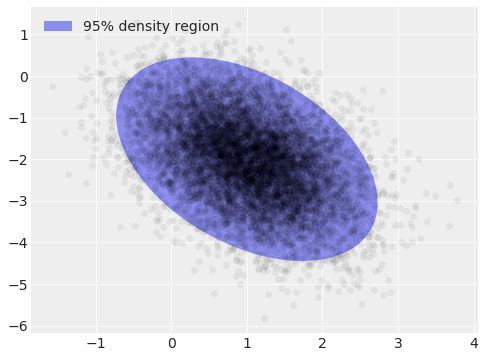

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

blue, _, red, *_ = sns.color_palette()

e = Ellipse(Œº_actual, 2 * np.sqrt(5.991 * var[0]),
            2 * np.sqrt(5.991 * var[1]),
            angle=angle)
e.set_alpha(0.5)
e.set_facecolor(blue)
e.set_zorder(10);
ax.add_artist(e);

ax.scatter(x[:, 0], x[:, 1], c='k', alpha=0.05, zorder=11);

rect = plt.Rectangle((0, 0), 1, 1, fc=blue, alpha=0.5)
ax.legend([rect], ['95% density region'], loc=2);

The sampling distribution for the multivariate normal model is x‚àºN(Œº,Œ£), where Œ£ is the covariance matrix of the sampling distribution, with Œ£ij=Cov(xi,xj). The density of this distribution is Â§öÂÖÉÊ≠£ÊÄÅÊ®°ÂûãÁöÑÈááÊ†∑ÂàÜÂ∏É‰∏∫x„ÄúNÔºàŒºÔºåŒ£ÔºâÔºåÂÖ∂‰∏≠Œ£‰∏∫ÈááÊ†∑ÂàÜÂ∏ÉÁöÑÂçèÊñπÂ∑ÆÁü©ÈòµÔºåÂÖ∂‰∏≠Œ£ij= CovÔºàxiÔºåxjÔºâ„ÄÇ ËØ•ÂàÜÂ∏ÉÁöÑÂØÜÂ∫¶‰∏∫

f(x | Œº,$Œ£^{‚àí1}$)=$(2œÄ)^{‚àí\frac {k}{2}}$$|Œ£|^{‚àí\frac12}$exp(${‚àí\frac12}$$(x‚àíŒº)^‚ä§Œ£^{‚àí1}$(x‚àíŒº)).

The LKJ distribution provides a prior on the correlation matrix, C=Corr(xi,xj), which, combined with priors on the standard deviations of each component, induces a prior on the covariance matrix, Œ£. Since inverting Œ£ is numerically unstable and inefficient, it is computationally advantageous to use the Cholesky decompositon of Œ£, Œ£=LL‚ä§, where L is a lower-triangular matrix. This decompositon allows computation of the term (x‚àíŒº)‚ä§Œ£‚àí1(x‚àíŒº) using back-substitution, which is more numerically stable and efficient than direct matrix inversion.LKJÂàÜÂ∏ÉÂú®Áõ∏ÂÖ≥Áü©ÈòµC = CorrÔºàxiÔºåxjÔºâ‰∏äÊèê‰æõ‰∫ÜÂÖàÈ™åÔºåÂÜç‰∏éÊØè‰∏™ÂàÜÈáèÁöÑÊ†áÂáÜÂÅèÂ∑ÆÁöÑÂÖàÈ™åÁõ∏ÁªìÂêàÔºåÂú®ÂçèÊñπÂ∑ÆÁü©ÈòµŒ£‰∏äÂæóÂá∫ÂÖàÈ™å„ÄÇ Áî±‰∫éÂØπŒ£ËøõË°åÊï∞ÂÄº‰∏äÁöÑ‰∏çÁ®≥ÂÆöÂíåÊïàÁéá‰Ωé‰∏ãÔºåÂõ†Ê≠§‰ΩøÁî®Œ£ÁöÑCholeskyÂàÜËß£Âú®ËÆ°ÁÆó‰∏äÊòØÊúâÂà©ÁöÑÔºåŒ£=LL‚ä§ÔºåÂÖ∂‰∏≠LÊòØ‰∏ã‰∏âËßíÁü©Èòµ„ÄÇ ËØ•ÂàÜËß£ÂÖÅËÆ∏‰ΩøÁî®ÈÄÜÁΩÆÊç¢Êù•ËÆ°ÁÆóÈ°πÔºàx-ŒºÔºâ‚ä§Œ£-1Ôºàx-ŒºÔºâÔºåËøôÊØîÁõ¥Êé•Áü©ÈòµÊ±ÇÈÄÜÂú®Êï∞ÂÄº‰∏äÊõ¥Á®≥ÂÆöÔºåÊõ¥È´òÊïà„ÄÇ

PyMC3 supports LKJ priors for the Cholesky decomposition of the covariance matrix via the LKJCholeskyCov distribution. This distribution has parameters n and sd_dist, which are the dimension of the observations, x, and the PyMC3 distribution of the component standard deviations, repsectively. It also has a hyperparamter eta, which controls the amount of correlation between components of x. The LKJ distribution has the density f(C | Œ∑)‚àù|C|Œ∑‚àí1, so Œ∑=1 leads to a uniform distribution on correlation matrices, while the magnitude of correlations between components decreases as Œ∑‚Üí‚àû.PyMC3ÊîØÊåÅÈÄöËøáLKJCholeskyCovÂàÜÂ∏ÉÂØπÂçèÊñπÂ∑ÆÁü©ÈòµËøõË°åCholeskyÂàÜËß£ÁöÑLKJÂÖàÈ™å„ÄÇ Ê≠§ÂàÜÂ∏ÉÂÖ∑ÊúâÂèÇÊï∞nÂíåsd_distÔºåÂàÜÂà´ÊòØËßÇÊµãÂÄºxÂíåÂàÜÈáèÊ†áÂáÜÂÅèÂ∑ÆÁöÑPyMC3ÂàÜÂ∏É„ÄÇ ÂÆÉËøòÂÖ∑Êúâ‰∏Ä‰∏™Ë∂ÖÂèÇÊï∞etaÔºåÂÆÉÊéßÂà∂xÂàÜÈáè‰πãÈó¥ÁöÑÁõ∏ÂÖ≥Èáè„ÄÇ LKJÂàÜÂ∏ÉÂÖ∑ÊúâÂØÜÂ∫¶fÔºàC |Œ∑Ôºâ‚àù | C |Œ∑-1ÔºåÂõ†Ê≠§Œ∑= 1ÂØºËá¥Áõ∏ÂÖ≥Áü©Èòµ‰∏äÁöÑÂùáÂåÄÂàÜÂ∏ÉÔºåËÄåÂàÜÈáè‰πãÈó¥ÁöÑÁõ∏ÂÖ≥Á®ãÂ∫¶ÂàôÈöèÁùÄŒ∑‚Üí‚àûËÄåÂáèÂ∞è„ÄÇ

In this example, we model the standard deviations with HalfCauchy(2.5) priors, and the correlation matrix as C‚àºLKJ(Œ∑=2).

In [5]:
with pm.Model() as model:
    packed_L = pm.LKJCholeskyCov('packed_L', n=2,
                                 eta=2., sd_dist=pm.HalfCauchy.dist(2.5))

Áî±‰∫éŒ£ÁöÑCholeskyÂàÜËß£ÊòØËæÉ‰ΩéÁöÑ‰∏âËßíÂΩ¢ÔºåÂõ†Ê≠§LKJ Cholesky Cov‰ªÖÂ≠òÂÇ®ÂØπËßíÁ∫øÂíåÊ¨°ÂØπËßíÁ∫øÈ°π‰ª•ÊèêÈ´òÊïàÁéá„ÄÇ

In [6]:
packed_L.tag.test_value.shape

(3,)

Êàë‰ª¨‰ΩøÁî®expand_packed_triangularÂ∞ÜÊ≠§ÂêëÈáèËΩ¨Êç¢‰∏∫‰∏ã‰∏âËßíÁü©ÈòµLÔºåËØ•Áü©ÈòµÂá∫Áé∞Âú®CholeskyÂàÜËß£Œ£= LL =‰∏≠„ÄÇ

In [7]:
with model:
    L = pm.expand_packed_triangular(2, packed_L)
    Œ£ = pm.Deterministic('Œ£', L.dot(L.T))

C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


In [8]:
L.tag.test_value.shape

(2, 2)

‰∏∫‰∫ÜÂÆåÂñÑÊàë‰ª¨ÁöÑÊ®°ÂûãËßÑËåÉÔºåÊàë‰ª¨Â∞ÜÁã¨Á´ãÁöÑÔºåÊ®°Á≥äÁöÑÊ≠£ÊÄÅÂÖàÈ™åŒºi„ÄúNÔºà0,102ÔºâÊîæÂú®ŒºÁöÑÂàÜÈáè‰∏ä„ÄÇ
Multivariate normal log-likelihood  
MvNormal(mu[, cov, tau, chol, lower])  Cholesky decomposition of covariance matrix. Exactly one of cov, tau, or chol is needed.

In [9]:
with model:
    Œº = pm.Normal('Œº', 0., 10., shape=2,
                  testval=x.mean(axis=0))
    obs = pm.MvNormal('obs', Œº, chol=L, observed=x)

In [10]:
with model:
    trace = pm.sample(random_seed=SEED, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; u

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

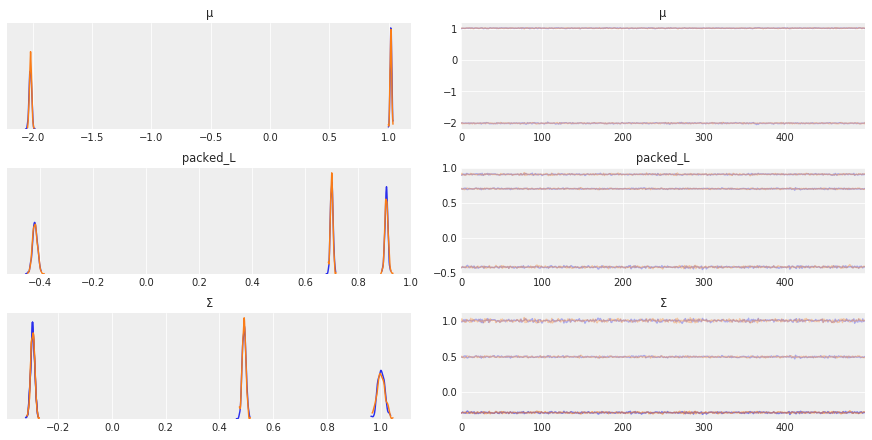

In [11]:
pm.traceplot(trace);

In [12]:
max(np.max(gr_stats) for gr_stats in pm.gelman_rubin(trace).values())

C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\stats\__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


<xarray.DataArray 'Œº' ()>
array(1.01026539)

We see that the posterior expected value of the each component of Œº and Œ£ is within 2% of the true value.

In [18]:
Œº_post = trace['Œº'].mean(axis=0)
1 - Œº_post / Œº_actual

array([-0.01854992, -0.00916851])

In [19]:
Œ£_post = trace['Œ£'].mean(axis=0)
1 - Œ£_post / Œ£_actual

array([[ 0.01670009,  0.01658972],
       [ 0.01658972, -0.00164974]])

The following plot also shows excellent visual agreement between the true distribution and the posterior distribution.

In [20]:
var_post, U_post = np.linalg.eig(Œ£_post)
angle_post = 180. / np.pi * np.arccos(np.abs(U_post[0, 0]))

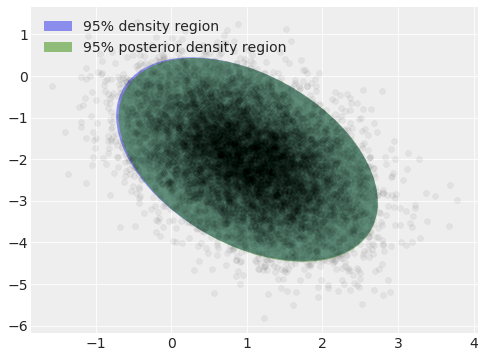

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

e = Ellipse(Œº_actual, 2 * np.sqrt(5.991 * var[0]),
            2 * np.sqrt(5.991 * var[1]),
            angle=angle)
e.set_alpha(0.5)
e.set_facecolor(blue)
e.set_zorder(10);
ax.add_artist(e);

e_post = Ellipse(Œº_post, 2 * np.sqrt(5.991 * var_post[0]),
                 2 * np.sqrt(5.991 * var_post[1]),
                 angle=angle_post)
e_post.set_alpha(0.5)
e_post.set_facecolor(red)
e_post.set_zorder(10);
ax.add_artist(e_post);

ax.scatter(x[:, 0], x[:, 1], c='k', alpha=0.05, zorder=11);

rect = plt.Rectangle((0, 0), 1, 1, fc=blue, alpha=0.5)
rect_post = plt.Rectangle((0, 0), 1, 1, fc=red, alpha=0.5)
ax.legend([rect, rect_post],
          ['95% density region',
           '95% posterior density region'],
          loc=2);

## Question 17
***

*Choose a dataset that you find interesting and use it with the simple linear regression model. Be sure to explore the results using ArviZ functions and compute the Pearson correlation coefficient. If you do not have an interesting dataset, try searching online, for example [here](https://data.worldbank.org/) or [there](http://users.stat.ufl.edu/~winner/datasets.html).*